# Tests DQN Family

In [19]:
import gym
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
from collections import deque

## vanilla DQN

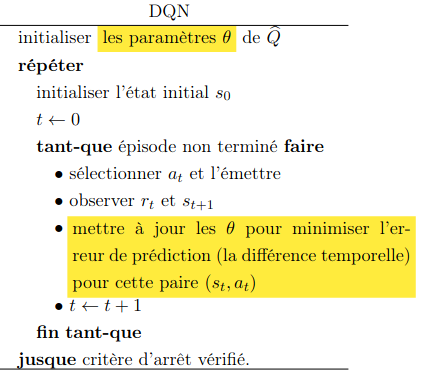

In [20]:
class QNetwork(nn.Module) :
    
    def __init__(self,
              nb_actions,
              nb_observations) : 
        
        super().__init__()
        self.nb_actions = nb_actions
        self.nb_observations = nb_observations
        
        self.net = nn.Sequential(
            nn.Linear(nb_observations, 125),
            nn.ReLU(),
            nn.Linear(125,100),
            nn.ReLU(),
            nn.Linear(100, nb_actions)
        )
        
    def forward(self,x) :
        return self.net(x)

In [21]:
def test(q_network) :
    timestepmax = 2000
    state = env.reset()
    done = False
    cum_sum = 0
    iteration = 0
    while not done and iteration < timestepmax:
        state_t = torch.as_tensor(state , dtype = torch.float32)
        action = torch.argmax(q_network(state_t)).item()
        new_state,reward,done,_ = env.step(action)
        state = new_state
        cum_sum += reward
        iteration += 1
        
    return cum_sum

In [22]:
# env = gym.make("CartPole-v0")
env = gym.make("LunarLander-v2")
nb_actions = 4
nb_observations = 8

In [23]:
nb_episode = 1000

discount_factor = 0.99
learning_rate = 2e-4
test_frequency = 10
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.02
update_frequency = 1

In [24]:

average_list = deque(maxlen=100)

q_network = QNetwork(nb_actions,nb_observations)
optimizer = torch.optim.Adam(q_network.parameters(), lr=learning_rate)
list_tests_1 = []
timestep = 0
for episode in tqdm(range(nb_episode)) :
    
    epsilon = max(epsilon * epsilon_decay,epsilon_min)
    
    state = env.reset()
    done = False
    cumul = 0
    while not done : 
        state_t = torch.as_tensor(state , dtype = torch.float32)
        
        if random.random() > epsilon :
            action = torch.argmax(q_network(state_t)).item()
        else :
            action = env.action_space.sample()
            
        new_state,reward,done,_ = env.step(action)
        cumul += reward
        
        if timestep % update_frequency == 0:

            done_t = torch.as_tensor(done , dtype = torch.int64)
            new_state_t = torch.as_tensor(new_state , dtype=torch.float32)
            action_t = torch.as_tensor(action , dtype = torch.int64)

            y_target = reward + discount_factor * (1 - done_t) * torch.max(q_network(new_state_t))

            mse = nn.MSELoss()

            loss = mse(torch.gather(q_network(state_t),dim=0,index=action_t), y_target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        state = new_state
        timestep += 1
    
    average_list.append(cumul)
    if episode % test_frequency == 0 :
        t =  0
        for _ in range(10) :
            t += test(q_network)
        t /= 10
        avg = sum(average_list) / len(average_list)
        print(f"episode {episode} - test reward : {t} - avg : {avg} - epsilon {epsilon}")
        list_tests_1.append(t)

  0%|                                          | 2/1000 [00:00<05:36,  2.96it/s]

episode 0 - test reward : -900.3341090485495 - avg : -92.80913716401844 - epsilon 0.995


  1%|▍                                        | 12/1000 [00:02<03:41,  4.46it/s]

episode 10 - test reward : -804.4431962152992 - avg : -178.95780008741573 - epsilon 0.946354579813443


  2%|▉                                        | 22/1000 [00:04<04:17,  3.80it/s]

episode 20 - test reward : -1039.2996786522374 - avg : -185.8312508728626 - epsilon 0.9000874278732445


  3%|█▎                                       | 32/1000 [00:07<04:23,  3.68it/s]

episode 30 - test reward : -867.0621338843448 - avg : -196.08523458031297 - epsilon 0.8560822709551227


  4%|█▋                                       | 42/1000 [00:08<03:32,  4.51it/s]

episode 40 - test reward : -564.0683268341295 - avg : -186.16549563555722 - epsilon 0.8142285204175609


  5%|██                                       | 51/1000 [00:11<06:47,  2.33it/s]

episode 50 - test reward : -1114.6415757355758 - avg : -195.34441839612512 - epsilon 0.7744209942832988


  6%|██▌                                      | 62/1000 [00:14<05:46,  2.70it/s]

episode 60 - test reward : -462.4248605314242 - avg : -204.45862689748878 - epsilon 0.736559652908221


  7%|██▉                                      | 71/1000 [00:16<05:54,  2.62it/s]

episode 70 - test reward : -374.0836616601924 - avg : -200.80415606958258 - epsilon 0.7005493475733617


  8%|███▎                                     | 82/1000 [00:21<11:03,  1.38it/s]

episode 80 - test reward : -732.1660413305061 - avg : -210.48044463873643 - epsilon 0.6662995813682115


  9%|███▊                                     | 92/1000 [00:35<41:07,  2.72s/it]

episode 90 - test reward : -183.4919293025175 - avg : -220.70137571729728 - epsilon 0.6337242817644086


 10%|████                                    | 101/1000 [00:37<05:54,  2.54it/s]

episode 100 - test reward : -426.11195612914906 - avg : -224.70940815060004 - epsilon 0.6027415843082742


 11%|████▍                                   | 111/1000 [00:41<10:24,  1.42it/s]

episode 110 - test reward : -756.1681114960696 - avg : -254.5699309750364 - epsilon 0.5732736268885887


 12%|████▉                                   | 122/1000 [00:45<05:10,  2.83it/s]

episode 120 - test reward : -530.3452983330392 - avg : -265.8466181176564 - epsilon 0.5452463540625918


 13%|█████▎                                  | 132/1000 [00:47<03:30,  4.13it/s]

episode 130 - test reward : -498.06502395292955 - avg : -275.50737703327786 - epsilon 0.5185893309484582


 14%|█████▋                                  | 142/1000 [00:49<02:28,  5.77it/s]

episode 140 - test reward : -536.8309785068403 - avg : -306.58158131240197 - epsilon 0.4932355662165453


 15%|██████                                  | 152/1000 [00:51<03:40,  3.84it/s]

episode 150 - test reward : -745.6330156144286 - avg : -314.963572113089 - epsilon 0.46912134373457726


 16%|██████▍                                 | 161/1000 [00:53<05:20,  2.61it/s]

episode 160 - test reward : -561.9799348048123 - avg : -320.74942977601086 - epsilon 0.446186062443672


 17%|██████▉                                 | 172/1000 [00:55<03:34,  3.87it/s]

episode 170 - test reward : -568.9611302781352 - avg : -357.31933506856484 - epsilon 0.42437208406280985


 18%|███████▎                                | 182/1000 [00:57<02:54,  4.68it/s]

episode 180 - test reward : -623.2413407542451 - avg : -383.8733587174032 - epsilon 0.4036245882390106


 19%|███████▋                                | 191/1000 [00:59<04:56,  2.73it/s]

episode 190 - test reward : -1012.2285198974862 - avg : -398.49018030138524 - epsilon 0.38389143477919885


 20%|████████                                | 201/1000 [01:02<03:39,  3.65it/s]

episode 200 - test reward : -620.696710995134 - avg : -418.6458096485036 - epsilon 0.36512303261753626


 21%|████████▍                               | 212/1000 [01:04<02:45,  4.78it/s]

episode 210 - test reward : -677.5029060899542 - avg : -406.5212190508303 - epsilon 0.3472722151889232


 22%|████████▉                               | 222/1000 [01:06<03:26,  3.77it/s]

episode 220 - test reward : -695.4499627012963 - avg : -413.30309020560594 - epsilon 0.3302941218954743


 23%|█████████▏                              | 231/1000 [01:08<03:50,  3.34it/s]

episode 230 - test reward : -309.5882422105268 - avg : -429.351291220875 - epsilon 0.3141460853680822


 24%|█████████▋                              | 242/1000 [01:10<02:41,  4.70it/s]

episode 240 - test reward : -619.2018322769577 - avg : -432.9678303341238 - epsilon 0.2987875242397482


 25%|██████████                              | 252/1000 [01:12<03:19,  3.74it/s]

episode 250 - test reward : -871.9381933764132 - avg : -448.9380104123351 - epsilon 0.28417984116121187


 26%|██████████▍                             | 261/1000 [01:14<02:59,  4.11it/s]

episode 260 - test reward : -356.59255345526697 - avg : -465.07627689453483 - epsilon 0.2702863258025825


 27%|██████████▉                             | 272/1000 [01:15<01:59,  6.07it/s]

episode 270 - test reward : -569.9095408548316 - avg : -460.4709366306913 - epsilon 0.2570720625972084


 28%|███████████▎                            | 282/1000 [01:17<01:53,  6.33it/s]

episode 280 - test reward : -648.8050091312974 - avg : -463.36175927402167 - epsilon 0.24450384299593592


 29%|███████████▋                            | 291/1000 [01:18<02:04,  5.69it/s]

episode 290 - test reward : -271.04921489559626 - avg : -463.9027162401325 - epsilon 0.23255008201124722


 30%|████████████                            | 302/1000 [01:20<01:57,  5.93it/s]

episode 300 - test reward : -575.0457151535592 - avg : -467.12390143305106 - epsilon 0.2211807388415433


 31%|████████████▍                           | 312/1000 [01:21<01:51,  6.19it/s]

episode 310 - test reward : -489.7955713867938 - avg : -482.5959953631157 - epsilon 0.21036724137609603


 32%|████████████▉                           | 322/1000 [01:23<01:52,  6.02it/s]

episode 320 - test reward : -609.5859704246246 - avg : -491.3514364213931 - epsilon 0.2000824143909432


 33%|█████████████▎                          | 332/1000 [01:24<01:57,  5.67it/s]

episode 330 - test reward : -583.9896927687083 - avg : -487.62937658036304 - epsilon 0.1903004112552766


 34%|█████████████▋                          | 342/1000 [01:26<01:50,  5.94it/s]

episode 340 - test reward : -566.9060596700501 - avg : -485.7103160161436 - epsilon 0.18099664897669618


 35%|██████████████                          | 351/1000 [01:27<03:02,  3.56it/s]

episode 350 - test reward : -450.8474276441867 - avg : -480.27384209752825 - epsilon 0.17214774642209296


 36%|██████████████▌                         | 363/1000 [01:30<01:45,  6.06it/s]

episode 360 - test reward : -536.8982136406562 - avg : -474.154722547196 - epsilon 0.16373146555890544


 37%|██████████████▊                         | 371/1000 [01:31<02:25,  4.32it/s]

episode 370 - test reward : -143.45482192504298 - avg : -468.6033795144649 - epsilon 0.1557266555690826


 38%|███████████████▎                        | 382/1000 [01:33<01:29,  6.93it/s]

episode 380 - test reward : -239.28273903939544 - avg : -447.54193959928796 - epsilon 0.14811319969530845


 39%|███████████████▋                        | 392/1000 [01:34<01:59,  5.11it/s]

episode 390 - test reward : -116.98709491848373 - avg : -431.53275415628747 - epsilon 0.14087196468590776


 40%|████████████████                        | 401/1000 [01:36<01:56,  5.16it/s]

episode 400 - test reward : -445.6573077987138 - avg : -433.952217030748 - epsilon 0.13398475271138335


 41%|████████████████▍                       | 411/1000 [01:38<02:03,  4.75it/s]

episode 410 - test reward : -281.55467138517065 - avg : -420.69246947952377 - epsilon 0.12743425563174798


 42%|████████████████▉                       | 422/1000 [01:40<02:27,  3.91it/s]

episode 420 - test reward : -1010.5470223869859 - avg : -434.7905968139762 - epsilon 0.12120401149972035


 43%|█████████████████▏                      | 431/1000 [01:42<02:09,  4.39it/s]

episode 430 - test reward : -628.2300719370752 - avg : -422.6495155353754 - epsilon 0.11527836319047392


 44%|█████████████████▋                      | 441/1000 [01:44<02:53,  3.23it/s]

episode 440 - test reward : -326.4265524153162 - avg : -418.7647135096679 - epsilon 0.10964241905397228


 45%|██████████████████                      | 452/1000 [01:46<01:54,  4.77it/s]

episode 450 - test reward : -499.5708101547286 - avg : -406.65502941650965 - epsilon 0.1042820154910064


 46%|██████████████████▍                     | 462/1000 [01:48<01:41,  5.30it/s]

episode 460 - test reward : -517.4592026834654 - avg : -416.6975843228132 - epsilon 0.09918368135888474


 47%|██████████████████▉                     | 473/1000 [01:50<01:22,  6.40it/s]

episode 470 - test reward : -582.4719930195088 - avg : -439.21182652057666 - epsilon 0.0943346041173244


 48%|███████████████████▎                    | 483/1000 [01:51<01:09,  7.48it/s]

episode 480 - test reward : -687.0344385207167 - avg : -455.8530219362401 - epsilon 0.08972259762946533


 49%|███████████████████▋                    | 491/1000 [01:52<01:12,  7.06it/s]

episode 490 - test reward : -712.0428546436317 - avg : -478.3607419348172 - epsilon 0.08533607153708872


 50%|████████████████████                    | 502/1000 [01:54<01:16,  6.53it/s]

episode 500 - test reward : -609.0824735089076 - avg : -479.45778696310214 - epsilon 0.0811640021330769


 51%|████████████████████▍                   | 512/1000 [01:55<01:04,  7.54it/s]

episode 510 - test reward : -483.3419010692138 - avg : -499.88185054969944 - epsilon 0.07719590465791494


 52%|████████████████████▉                   | 522/1000 [01:56<01:12,  6.57it/s]

episode 520 - test reward : -99.24569897744308 - avg : -491.25832398575943 - epsilon 0.07342180695061275


 53%|█████████████████████▎                  | 532/1000 [01:58<01:30,  5.16it/s]

episode 530 - test reward : -636.0959476132576 - avg : -519.7867315964905 - epsilon 0.06983222438783


 54%|█████████████████████▋                  | 542/1000 [02:00<01:35,  4.79it/s]

episode 540 - test reward : -569.0681021867291 - avg : -499.735010688743 - epsilon 0.06641813604822402


 55%|██████████████████████                  | 552/1000 [02:02<01:29,  4.99it/s]

episode 550 - test reward : -475.70078164381937 - avg : -512.6745589664225 - epsilon 0.06317096204211972


 56%|██████████████████████▍                 | 561/1000 [02:04<01:53,  3.86it/s]

episode 560 - test reward : -200.83993967911223 - avg : -502.36271342734074 - epsilon 0.06008254194952879


 57%|██████████████████████▊                 | 571/1000 [02:06<01:59,  3.60it/s]

episode 570 - test reward : -669.2908809399902 - avg : -506.04203520735007 - epsilon 0.05714511431233153


 58%|███████████████████████▎                | 582/1000 [02:08<01:47,  3.89it/s]

episode 580 - test reward : -759.7770939529873 - avg : -524.6536918053725 - epsilon 0.0543512971290831


 59%|███████████████████████▋                | 592/1000 [02:11<01:42,  3.98it/s]

episode 590 - test reward : -528.8737263594019 - avg : -533.3491581879532 - epsilon 0.05169406930342616


 60%|████████████████████████                | 602/1000 [02:12<01:28,  4.50it/s]

episode 600 - test reward : -591.0374979573087 - avg : -521.3935498036474 - epsilon 0.04916675299948831


 61%|████████████████████████▍               | 612/1000 [02:14<01:05,  5.96it/s]

episode 610 - test reward : -79.7163829633071 - avg : -496.57286348916205 - epsilon 0.04676299685992172


 62%|████████████████████████▉               | 622/1000 [02:16<01:23,  4.52it/s]

episode 620 - test reward : -96.18502962300064 - avg : -470.6961730648706 - epsilon 0.04447676004441063


 63%|█████████████████████████▏              | 631/1000 [02:18<01:42,  3.60it/s]

episode 630 - test reward : -223.73471110197602 - avg : -447.4744410889629 - epsilon 0.04230229704853423


 64%|█████████████████████████▋              | 641/1000 [02:20<01:13,  4.88it/s]

episode 640 - test reward : -575.2651194810226 - avg : -448.60908157257364 - epsilon 0.04023414326483323


 65%|██████████████████████████              | 652/1000 [02:23<01:40,  3.46it/s]

episode 650 - test reward : -500.488520166991 - avg : -494.3476715002142 - epsilon 0.03826710124979409


 66%|██████████████████████████▍             | 661/1000 [02:24<00:48,  7.03it/s]

episode 660 - test reward : -373.804175680047 - avg : -501.5461253921554 - epsilon 0.036396227662238566


 67%|██████████████████████████▉             | 672/1000 [02:26<00:56,  5.81it/s]

episode 670 - test reward : -611.6309469098829 - avg : -469.4341545102327 - epsilon 0.03461682084029365


 68%|███████████████████████████▎            | 682/1000 [02:27<00:57,  5.50it/s]

episode 680 - test reward : -118.56100161426654 - avg : -427.5043843584519 - epsilon 0.032924408985721944


 69%|███████████████████████████▋            | 692/1000 [02:29<00:45,  6.78it/s]

episode 690 - test reward : -582.0551366353363 - avg : -395.86853436428225 - epsilon 0.03131473892591842


 70%|████████████████████████████            | 701/1000 [02:30<00:38,  7.77it/s]

episode 700 - test reward : -182.34456530903572 - avg : -372.7900367743695 - epsilon 0.029783765425331846


 71%|████████████████████████████▍           | 712/1000 [02:31<00:37,  7.65it/s]

episode 710 - test reward : -417.9373738377829 - avg : -377.76746363176875 - epsilon 0.02832764101944931


 72%|████████████████████████████▉           | 722/1000 [02:33<00:49,  5.58it/s]

episode 720 - test reward : -521.2221327953952 - avg : -370.6318925657465 - epsilon 0.02694270634579598


 73%|█████████████████████████████▎          | 732/1000 [02:34<00:41,  6.48it/s]

episode 730 - test reward : -546.7248801485183 - avg : -364.3032645250503 - epsilon 0.02562548094765099


 74%|█████████████████████████████▋          | 742/1000 [02:36<00:53,  4.80it/s]

episode 740 - test reward : -418.2928756173049 - avg : -386.3586729779594 - epsilon 0.02437265452736848


 75%|██████████████████████████████          | 752/1000 [02:37<00:34,  7.22it/s]

episode 750 - test reward : -121.6978018964328 - avg : -333.38951177278545 - epsilon 0.023181078627322618


 76%|██████████████████████████████▍         | 762/1000 [02:38<00:30,  7.77it/s]

episode 760 - test reward : -399.2521089687639 - avg : -305.1715583884199 - epsilon 0.022047758717570132


 77%|██████████████████████████████▉         | 772/1000 [02:40<00:30,  7.48it/s]

episode 770 - test reward : -128.25550441647405 - avg : -311.8952136200667 - epsilon 0.020969846670345987


 78%|███████████████████████████████▎        | 782/1000 [02:41<00:27,  8.05it/s]

episode 780 - test reward : -140.93118933718458 - avg : -295.000288315013 - epsilon 0.02


 79%|███████████████████████████████▋        | 792/1000 [02:42<00:34,  6.09it/s]

episode 790 - test reward : -138.9038764860361 - avg : -284.90612291102894 - epsilon 0.02


 80%|████████████████████████████████        | 802/1000 [02:44<00:40,  4.94it/s]

episode 800 - test reward : -377.86908638621935 - avg : -283.7368247026582 - epsilon 0.02


 81%|████████████████████████████████▍       | 812/1000 [02:46<00:30,  6.13it/s]

episode 810 - test reward : -510.1223865713795 - avg : -272.8044792435122 - epsilon 0.02


 82%|████████████████████████████████▉       | 822/1000 [02:47<00:36,  4.88it/s]

episode 820 - test reward : -519.1725352135303 - avg : -300.194668109834 - epsilon 0.02


 83%|█████████████████████████████████▏      | 831/1000 [02:49<01:04,  2.61it/s]

episode 830 - test reward : -1045.442423387493 - avg : -334.5385789131196 - epsilon 0.02


 84%|█████████████████████████████████▋      | 842/1000 [02:53<00:57,  2.74it/s]

episode 840 - test reward : -806.2156662635068 - avg : -364.708431730174 - epsilon 0.02


 85%|██████████████████████████████████      | 851/1000 [02:56<01:09,  2.14it/s]

episode 850 - test reward : -687.6166633044884 - avg : -419.2979478259986 - epsilon 0.02


 86%|██████████████████████████████████▍     | 862/1000 [02:59<00:44,  3.11it/s]

episode 860 - test reward : -1023.0433077077674 - avg : -480.6213103626191 - epsilon 0.02


 87%|██████████████████████████████████▊     | 871/1000 [03:02<00:54,  2.39it/s]

episode 870 - test reward : -914.7826953713717 - avg : -505.26008637343205 - epsilon 0.02


 88%|███████████████████████████████████▏    | 881/1000 [03:05<00:49,  2.40it/s]

episode 880 - test reward : -850.3369630298542 - avg : -573.6131520976411 - epsilon 0.02


 89%|███████████████████████████████████▋    | 891/1000 [03:08<00:37,  2.92it/s]

episode 890 - test reward : -742.5052165362118 - avg : -636.2484088728481 - epsilon 0.02


 90%|████████████████████████████████████    | 901/1000 [03:12<00:53,  1.87it/s]

episode 900 - test reward : -1039.4900012383482 - avg : -695.5779565211227 - epsilon 0.02


 91%|████████████████████████████████████▍   | 911/1000 [03:15<00:39,  2.28it/s]

episode 910 - test reward : -1003.0574251776623 - avg : -744.6238705261756 - epsilon 0.02


 92%|████████████████████████████████████▊   | 921/1000 [03:19<00:42,  1.86it/s]

episode 920 - test reward : -687.9238084081878 - avg : -819.6569917356348 - epsilon 0.02


 93%|█████████████████████████████████████▏  | 931/1000 [03:23<00:33,  2.07it/s]

episode 930 - test reward : -1064.022260999864 - avg : -808.6118621998926 - epsilon 0.02


 94%|█████████████████████████████████████▋  | 941/1000 [03:26<00:22,  2.61it/s]

episode 940 - test reward : -694.9122127695952 - avg : -801.3798989104356 - epsilon 0.02


 95%|██████████████████████████████████████  | 951/1000 [03:28<00:14,  3.41it/s]

episode 950 - test reward : -452.4537661907019 - avg : -762.6653890929447 - epsilon 0.02


 96%|██████████████████████████████████████▍ | 961/1000 [03:31<00:12,  3.04it/s]

episode 960 - test reward : -827.2787365894146 - avg : -745.6426771643899 - epsilon 0.02


 97%|██████████████████████████████████████▊ | 971/1000 [03:34<00:11,  2.52it/s]

episode 970 - test reward : -905.0280290300847 - avg : -776.0102026863057 - epsilon 0.02


 98%|███████████████████████████████████████▏| 981/1000 [03:36<00:03,  5.57it/s]

episode 980 - test reward : -469.9911941403834 - avg : -769.4945824805394 - epsilon 0.02


 99%|███████████████████████████████████████▋| 992/1000 [03:38<00:01,  6.37it/s]

episode 990 - test reward : -227.8758934404656 - avg : -740.8373347361431 - epsilon 0.02


100%|███████████████████████████████████████| 1000/1000 [03:39<00:00,  4.56it/s]


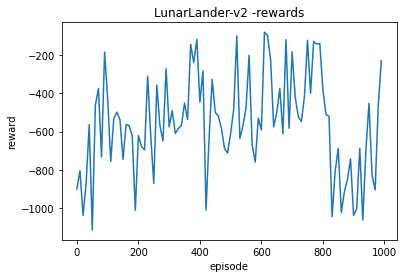

In [25]:
plt.figure()
plt.title("LunarLander-v2 -rewards")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_1)
plt.show()

## DQN with Experience Replay Buffer

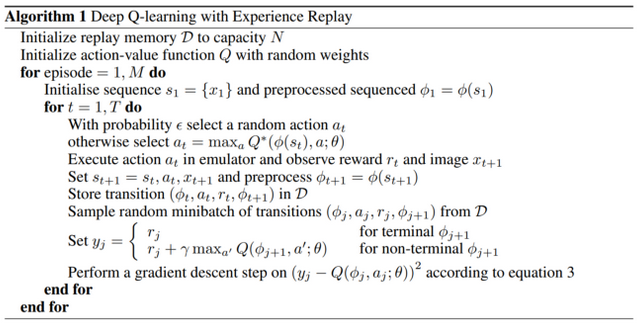

In [26]:
nb_episode = 1000

discount_factor = 0.99
learning_rate = 2e-4
test_frequency = 10
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.02
batch_size = 64
size_replay_buffer = 10000
update_frequency = 1

In [27]:


replay_buffer = deque(maxlen=size_replay_buffer)
q_network = QNetwork(nb_actions,nb_observations)

timestep = 0

optimizer = torch.optim.Adam(q_network.parameters(), lr=learning_rate)
list_tests_2 = []

average_list = deque(maxlen=100)
for episode in tqdm(range(nb_episode)) :
    state = env.reset()
    done = False
    cumul = 0
    epsilon = max(epsilon * epsilon_decay,epsilon_min)
    
    while not done : 
        state_t = torch.as_tensor(state , dtype = torch.float32)
        
        if random.random() > epsilon :
            action = torch.argmax(q_network(state_t)).item()
        else :
            action = env.action_space.sample()
            
        new_state,reward,done,_ = env.step(action)
        
        cumul += reward
        
        transition = (state,action,done,reward,new_state)
        replay_buffer.append(transition)
        
        if len(replay_buffer) >= batch_size and timestep % update_frequency == 0 :
        
            
            batch = random.sample(replay_buffer,batch_size)

            states = np.asarray([exp[0] for exp in batch],dtype=np.float32)
            actions = np.asarray([exp[1] for exp in batch],dtype=int)
            dones = np.asarray([exp[2] for exp in batch],dtype=int)
            rewards = np.asarray([exp[3] for exp in batch],dtype=np.float32)
            new_states = np.asarray([exp[4] for exp in batch],dtype=np.float32)

            
            states_t = torch.as_tensor(states , dtype=torch.float32)
            dones_t = torch.as_tensor(dones , dtype = torch.int64)
            new_states_t = torch.as_tensor(new_states , dtype=torch.float32)
            actions_t = torch.as_tensor(actions , dtype = torch.int64).unsqueeze(1)
            rewards_t = torch.as_tensor(rewards , dtype=torch.float32)
            
            y_target = rewards_t + discount_factor * (1 - dones_t) * torch.max(q_network(new_states_t),dim=1)[0]

            mse = nn.MSELoss()

            loss = mse(torch.gather(q_network(states_t),dim=1,index=actions_t), y_target.unsqueeze(1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        state = new_state
        timestep += 1
    
    average_list.append(cumul)
    if episode % test_frequency == 0 :
        t =  0
        for _ in range(10) :
            t += test(q_network)
        t /= 10
        avg = sum(average_list) / len(average_list)
        print(f"episode {episode} - test reward : {t} - avg : {avg} - epsilon {epsilon}")
        list_tests_2.append(t)

  0%|                                          | 1/1000 [00:00<09:10,  1.82it/s]

episode 0 - test reward : -794.3930568488163 - avg : -31.870779784706485 - epsilon 0.995


  1%|▍                                        | 11/1000 [00:04<11:01,  1.49it/s]

episode 10 - test reward : -354.4260614818945 - avg : -185.50991220540814 - epsilon 0.946354579813443


  2%|▊                                        | 21/1000 [00:12<23:15,  1.43s/it]

episode 20 - test reward : -425.5580070338839 - avg : -207.91674444517923 - epsilon 0.9000874278732445


  3%|█▎                                       | 31/1000 [00:20<25:46,  1.60s/it]

episode 30 - test reward : -705.7230070667122 - avg : -185.05807850782645 - epsilon 0.8560822709551227


  4%|█▋                                       | 41/1000 [00:29<26:51,  1.68s/it]

episode 40 - test reward : -369.3441590380968 - avg : -179.3147197830984 - epsilon 0.8142285204175609


  5%|██                                       | 51/1000 [00:37<29:10,  1.84s/it]

episode 50 - test reward : -343.4253209009074 - avg : -190.44603061132779 - epsilon 0.7744209942832988


  6%|██▌                                      | 62/1000 [00:41<08:24,  1.86it/s]

episode 60 - test reward : -524.440711291669 - avg : -187.93879920870566 - epsilon 0.736559652908221


  7%|██▉                                      | 72/1000 [00:45<08:45,  1.77it/s]

episode 70 - test reward : -87.92115920855154 - avg : -188.352960331939 - epsilon 0.7005493475733617


  8%|███▎                                     | 81/1000 [00:49<07:07,  2.15it/s]

episode 80 - test reward : -63.74449730765705 - avg : -184.25995792774086 - epsilon 0.6662995813682115


  9%|███▊                                     | 92/1000 [00:52<05:35,  2.70it/s]

episode 90 - test reward : -93.56611112388816 - avg : -182.26707107129462 - epsilon 0.6337242817644086


 10%|████                                    | 101/1000 [00:57<10:59,  1.36it/s]

episode 100 - test reward : -57.67256795569905 - avg : -171.77318792391202 - epsilon 0.6027415843082742


 11%|████▍                                   | 111/1000 [01:03<16:18,  1.10s/it]

episode 110 - test reward : -47.48059214641974 - avg : -156.53598933822914 - epsilon 0.5732736268885887


 12%|████▊                                   | 121/1000 [01:07<08:40,  1.69it/s]

episode 120 - test reward : -126.90795500356094 - avg : -141.2274411020009 - epsilon 0.5452463540625918


 13%|█████▏                                  | 131/1000 [01:12<10:10,  1.42it/s]

episode 130 - test reward : -115.64930930212185 - avg : -135.24162595003656 - epsilon 0.5185893309484582


 14%|█████▋                                  | 141/1000 [01:17<14:01,  1.02it/s]

episode 140 - test reward : -94.2610273447647 - avg : -123.42390190745593 - epsilon 0.4932355662165453


 15%|██████                                  | 151/1000 [01:26<25:03,  1.77s/it]

episode 150 - test reward : -26.63305877506184 - avg : -106.1637689607272 - epsilon 0.46912134373457726


 16%|██████▍                                 | 161/1000 [01:40<46:14,  3.31s/it]

episode 160 - test reward : -58.79024707652273 - avg : -92.05985313687114 - epsilon 0.446186062443672


 17%|██████▊                                 | 171/1000 [01:55<40:10,  2.91s/it]

episode 170 - test reward : -22.781715668958576 - avg : -79.86373683257003 - epsilon 0.42437208406280985


 18%|███████▏                                | 181/1000 [02:06<25:50,  1.89s/it]

episode 180 - test reward : -139.80404145354868 - avg : -76.53372868216765 - epsilon 0.4036245882390106


 19%|███████▋                                | 191/1000 [02:24<58:29,  4.34s/it]

episode 190 - test reward : -59.19139081481465 - avg : -71.65984832895546 - epsilon 0.38389143477919885


 20%|███████▋                              | 201/1000 [02:52<1:27:39,  6.58s/it]

episode 200 - test reward : -118.34333783063926 - avg : -67.07812616196534 - epsilon 0.36512303261753626


 21%|████████▍                               | 211/1000 [03:07<36:03,  2.74s/it]

episode 210 - test reward : -141.3736342402619 - avg : -65.6462880483121 - epsilon 0.3472722151889232


 22%|████████▊                               | 221/1000 [03:21<37:44,  2.91s/it]

episode 220 - test reward : -103.30349421344386 - avg : -62.07686749196295 - epsilon 0.3302941218954743


 23%|█████████▏                              | 231/1000 [03:39<50:28,  3.94s/it]

episode 230 - test reward : -106.14593827040426 - avg : -57.60202273987465 - epsilon 0.3141460853680822


 24%|█████████▏                            | 241/1000 [04:02<1:00:37,  4.79s/it]

episode 240 - test reward : -146.1549395620571 - avg : -57.89530507358521 - epsilon 0.2987875242397482


 25%|█████████▌                            | 251/1000 [04:36<1:21:58,  6.57s/it]

episode 250 - test reward : -174.52891327277976 - avg : -57.632770233943674 - epsilon 0.28417984116121187


 26%|██████████▍                             | 261/1000 [05:03<58:53,  4.78s/it]

episode 260 - test reward : -79.91630367940395 - avg : -57.85638349411485 - epsilon 0.2702863258025825


 27%|██████████▊                             | 271/1000 [05:29<58:54,  4.85s/it]

episode 270 - test reward : -128.44574811660567 - avg : -59.74083145380995 - epsilon 0.2570720625972084


 28%|███████████▏                            | 281/1000 [05:55<56:54,  4.75s/it]

episode 280 - test reward : -96.35027924438253 - avg : -55.02794438502996 - epsilon 0.24450384299593592


 29%|███████████                           | 291/1000 [06:29<1:31:20,  7.73s/it]

episode 290 - test reward : -29.133004780492723 - avg : -52.39664439042178 - epsilon 0.23255008201124722


 30%|███████████▍                          | 301/1000 [07:10<1:21:07,  6.96s/it]

episode 300 - test reward : -59.635554318012495 - avg : -53.7521986756291 - epsilon 0.2211807388415433


 31%|███████████▊                          | 311/1000 [07:52<1:21:58,  7.14s/it]

episode 310 - test reward : 12.008315348375636 - avg : -55.11125132093719 - epsilon 0.21036724137609603


 32%|████████████▊                           | 321/1000 [08:37<56:19,  4.98s/it]

episode 320 - test reward : 72.51396788220063 - avg : -43.481490626655486 - epsilon 0.2000824143909432


 33%|█████████████▏                          | 331/1000 [09:07<46:16,  4.15s/it]

episode 330 - test reward : 4.224945110287569 - avg : -37.62823183806666 - epsilon 0.1903004112552766


 34%|█████████████▋                          | 341/1000 [09:29<48:08,  4.38s/it]

episode 340 - test reward : -53.00934505038889 - avg : -40.74329378497154 - epsilon 0.18099664897669618


 35%|██████████████                          | 351/1000 [09:53<47:05,  4.35s/it]

episode 350 - test reward : -82.89962734502261 - avg : -43.9771750269226 - epsilon 0.17214774642209296


 36%|█████████████▋                        | 361/1000 [10:39<1:22:31,  7.75s/it]

episode 360 - test reward : -20.96349090012791 - avg : -35.66691963248135 - epsilon 0.16373146555890544


 37%|██████████████▊                         | 371/1000 [11:15<57:16,  5.46s/it]

episode 370 - test reward : 130.00387377466907 - avg : -17.680299600977825 - epsilon 0.1557266555690826


 38%|███████████████▏                        | 381/1000 [11:42<28:36,  2.77s/it]

episode 380 - test reward : 233.06487630584175 - avg : 8.321618856114714 - epsilon 0.14811319969530845


 39%|███████████████▋                        | 391/1000 [11:57<23:29,  2.31s/it]

episode 390 - test reward : 148.188323943203 - avg : 31.34969104424436 - epsilon 0.14087196468590776


 40%|████████████████                        | 401/1000 [12:15<17:56,  1.80s/it]

episode 400 - test reward : -3.60740954559373 - avg : 41.07223484955468 - epsilon 0.13398475271138335


 41%|████████████████▍                       | 411/1000 [12:27<24:15,  2.47s/it]

episode 410 - test reward : -51.37197345087185 - avg : 41.52650262765769 - epsilon 0.12743425563174798


 42%|████████████████▊                       | 421/1000 [12:44<26:42,  2.77s/it]

episode 420 - test reward : 158.79646894046482 - avg : 48.90049187598503 - epsilon 0.12120401149972035


 43%|█████████████████▏                      | 431/1000 [12:57<20:17,  2.14s/it]

episode 430 - test reward : 176.99251745758386 - avg : 46.739950504638045 - epsilon 0.11527836319047392


 44%|█████████████████▋                      | 441/1000 [13:29<49:49,  5.35s/it]

episode 440 - test reward : 33.61086875370016 - avg : 60.21056187116692 - epsilon 0.10964241905397228


 45%|██████████████████                      | 451/1000 [13:56<48:28,  5.30s/it]

episode 450 - test reward : 159.26833116275367 - avg : 77.2187929322632 - epsilon 0.1042820154910064


 46%|██████████████████▍                     | 461/1000 [14:20<34:20,  3.82s/it]

episode 460 - test reward : 140.42745876377518 - avg : 86.04408501003726 - epsilon 0.09918368135888474


 47%|██████████████████▊                     | 471/1000 [14:40<26:35,  3.02s/it]

episode 470 - test reward : 72.75132636887922 - avg : 83.9616632403481 - epsilon 0.0943346041173244


 48%|███████████████████▏                    | 481/1000 [14:54<16:32,  1.91s/it]

episode 480 - test reward : 236.65465209254708 - avg : 87.00054541836525 - epsilon 0.08972259762946533


 49%|███████████████████▋                    | 491/1000 [15:17<32:09,  3.79s/it]

episode 490 - test reward : 206.29042752954427 - avg : 94.56589493807384 - epsilon 0.08533607153708872


 50%|████████████████████                    | 501/1000 [15:34<16:32,  1.99s/it]

episode 500 - test reward : 254.91784681062344 - avg : 98.0979337334339 - epsilon 0.0811640021330769


 51%|████████████████████▍                   | 511/1000 [15:44<12:04,  1.48s/it]

episode 510 - test reward : 170.81591695590052 - avg : 122.80801822117824 - epsilon 0.07719590465791494


 52%|████████████████████▊                   | 521/1000 [15:54<10:11,  1.28s/it]

episode 520 - test reward : 236.02651843981917 - avg : 128.9637944045 - epsilon 0.07342180695061275


 53%|█████████████████████▏                  | 531/1000 [16:13<17:14,  2.21s/it]

episode 530 - test reward : 204.7821686668637 - avg : 147.89255047696142 - epsilon 0.06983222438783


 54%|█████████████████████▋                  | 541/1000 [16:21<07:10,  1.07it/s]

episode 540 - test reward : -37.87582088834879 - avg : 154.4109053999551 - epsilon 0.06641813604822402


 55%|██████████████████████                  | 551/1000 [16:34<15:16,  2.04s/it]

episode 550 - test reward : 187.9403969364007 - avg : 169.5598489825557 - epsilon 0.06317096204211972


 56%|██████████████████████▍                 | 561/1000 [16:48<13:46,  1.88s/it]

episode 560 - test reward : 222.68087418274953 - avg : 180.14125237496145 - epsilon 0.06008254194952879


 57%|██████████████████████▉                 | 572/1000 [17:03<12:09,  1.70s/it]

episode 570 - test reward : 159.1836653335637 - avg : 188.31674161848204 - epsilon 0.05714511431233153


 58%|███████████████████████▏                | 581/1000 [17:15<11:02,  1.58s/it]

episode 580 - test reward : 240.8855189488717 - avg : 185.40982169367769 - epsilon 0.0543512971290831


 59%|███████████████████████▋                | 591/1000 [17:31<11:23,  1.67s/it]

episode 590 - test reward : 142.98623290386212 - avg : 184.18931875036245 - epsilon 0.05169406930342616


 60%|████████████████████████                | 601/1000 [17:38<04:18,  1.54it/s]

episode 600 - test reward : 56.477024483293256 - avg : 171.3945933645547 - epsilon 0.04916675299948831


 61%|████████████████████████▍               | 611/1000 [17:44<05:36,  1.16it/s]

episode 610 - test reward : 146.66137670468336 - avg : 141.50196161316043 - epsilon 0.04676299685992172


 62%|████████████████████████▊               | 621/1000 [18:03<17:49,  2.82s/it]

episode 620 - test reward : -51.267094819585715 - avg : 131.21220432286862 - epsilon 0.04447676004441063


 63%|█████████████████████████▏              | 631/1000 [18:19<15:45,  2.56s/it]

episode 630 - test reward : 244.21015695977022 - avg : 120.50002207257442 - epsilon 0.04230229704853423


 64%|█████████████████████████▋              | 641/1000 [18:38<15:05,  2.52s/it]

episode 640 - test reward : 84.50979121300732 - avg : 123.53307717798981 - epsilon 0.04023414326483323


 65%|██████████████████████████              | 651/1000 [18:59<11:45,  2.02s/it]

episode 650 - test reward : 184.28369576883213 - avg : 120.44146141059302 - epsilon 0.03826710124979409


 66%|██████████████████████████▍             | 661/1000 [19:12<13:07,  2.32s/it]

episode 660 - test reward : 43.79555409607792 - avg : 117.72749133057876 - epsilon 0.036396227662238566


 67%|██████████████████████████▊             | 671/1000 [19:28<09:43,  1.77s/it]

episode 670 - test reward : 167.33258550095988 - avg : 120.03026517188769 - epsilon 0.03461682084029365


 68%|███████████████████████████▏            | 681/1000 [19:39<07:57,  1.50s/it]

episode 680 - test reward : 202.52308121998678 - avg : 125.67748746764748 - epsilon 0.032924408985721944


 69%|███████████████████████████▋            | 691/1000 [19:47<05:18,  1.03s/it]

episode 690 - test reward : 211.56216943218232 - avg : 126.1473258367282 - epsilon 0.03131473892591842


 70%|████████████████████████████            | 701/1000 [19:59<08:30,  1.71s/it]

episode 700 - test reward : 100.68939473633372 - avg : 146.8439467321368 - epsilon 0.029783765425331846


 71%|████████████████████████████▍           | 711/1000 [20:15<07:52,  1.63s/it]

episode 710 - test reward : 82.41189362820467 - avg : 162.17078999235636 - epsilon 0.02832764101944931


 72%|████████████████████████████▊           | 721/1000 [20:24<06:05,  1.31s/it]

episode 720 - test reward : 93.98317324459626 - avg : 160.91777264041878 - epsilon 0.02694270634579598


 73%|█████████████████████████████▏          | 731/1000 [20:34<07:42,  1.72s/it]

episode 730 - test reward : 41.7246768380864 - avg : 150.11568347530152 - epsilon 0.02562548094765099


 74%|█████████████████████████████▋          | 741/1000 [20:43<07:00,  1.62s/it]

episode 740 - test reward : -120.13391010966602 - avg : 138.69053391220297 - epsilon 0.02437265452736848


 75%|██████████████████████████████          | 751/1000 [21:08<18:55,  4.56s/it]

episode 750 - test reward : 109.31641444731103 - avg : 129.699236740369 - epsilon 0.023181078627322618


 76%|██████████████████████████████▍         | 761/1000 [21:28<06:39,  1.67s/it]

episode 760 - test reward : 128.48414451566592 - avg : 120.9539038317196 - epsilon 0.022047758717570132


 77%|██████████████████████████████▊         | 771/1000 [21:37<03:28,  1.10it/s]

episode 770 - test reward : -39.87690639363137 - avg : 116.43213591754267 - epsilon 0.020969846670345987


 78%|███████████████████████████████▏        | 781/1000 [21:48<06:45,  1.85s/it]

episode 780 - test reward : 143.42856171909156 - avg : 94.88788724566953 - epsilon 0.02


 79%|███████████████████████████████▋        | 791/1000 [22:00<05:53,  1.69s/it]

episode 790 - test reward : 235.18786245741566 - avg : 86.7749332300913 - epsilon 0.02


 80%|████████████████████████████████        | 801/1000 [22:13<06:36,  1.99s/it]

episode 800 - test reward : 181.38737983562677 - avg : 78.3387511347794 - epsilon 0.02


 81%|████████████████████████████████▍       | 811/1000 [22:36<08:47,  2.79s/it]

episode 810 - test reward : 195.0495630866483 - avg : 87.83205271075457 - epsilon 0.02


 82%|████████████████████████████████▊       | 821/1000 [22:59<11:47,  3.95s/it]

episode 820 - test reward : 141.97687054426714 - avg : 93.328506359358 - epsilon 0.02


 83%|█████████████████████████████████▏      | 831/1000 [23:20<06:40,  2.37s/it]

episode 830 - test reward : 192.4809832891308 - avg : 108.90206470300433 - epsilon 0.02


 84%|█████████████████████████████████▋      | 841/1000 [23:33<03:56,  1.49s/it]

episode 840 - test reward : 194.789129127482 - avg : 121.03862440229719 - epsilon 0.02


 85%|██████████████████████████████████      | 851/1000 [23:42<03:30,  1.41s/it]

episode 850 - test reward : -64.29267148451153 - avg : 108.78993668518193 - epsilon 0.02


 86%|██████████████████████████████████▍     | 861/1000 [24:01<06:41,  2.89s/it]

episode 860 - test reward : 193.6343469971443 - avg : 98.25135692036719 - epsilon 0.02


 87%|██████████████████████████████████▊     | 871/1000 [24:18<04:05,  1.91s/it]

episode 870 - test reward : 234.98598159390068 - avg : 103.92988186624825 - epsilon 0.02


 88%|███████████████████████████████████▏    | 881/1000 [24:36<04:24,  2.22s/it]

episode 880 - test reward : 153.92098224387647 - avg : 118.53425907204502 - epsilon 0.02


 89%|███████████████████████████████████▋    | 891/1000 [24:47<03:23,  1.87s/it]

episode 890 - test reward : 127.19054940509844 - avg : 124.10314204767128 - epsilon 0.02


 90%|████████████████████████████████████    | 901/1000 [24:59<03:01,  1.83s/it]

episode 900 - test reward : 157.16707928975157 - avg : 130.77917028481116 - epsilon 0.02


 91%|████████████████████████████████████▍   | 911/1000 [25:13<02:56,  1.98s/it]

episode 910 - test reward : 228.23160074483363 - avg : 136.97168410707638 - epsilon 0.02


 92%|████████████████████████████████████▊   | 921/1000 [25:28<01:55,  1.47s/it]

episode 920 - test reward : 219.2877178677295 - avg : 143.41455548461033 - epsilon 0.02


 93%|█████████████████████████████████████▏  | 931/1000 [25:38<01:18,  1.14s/it]

episode 930 - test reward : 244.7166325468676 - avg : 154.78047001212926 - epsilon 0.02


 94%|█████████████████████████████████████▋  | 941/1000 [25:50<01:33,  1.59s/it]

episode 940 - test reward : 166.86197805592877 - avg : 161.68306438257153 - epsilon 0.02


 95%|██████████████████████████████████████  | 951/1000 [26:00<01:05,  1.33s/it]

episode 950 - test reward : 221.19544162673964 - avg : 181.54030765017265 - epsilon 0.02


 96%|██████████████████████████████████████▍ | 961/1000 [26:11<01:06,  1.70s/it]

episode 960 - test reward : 74.12946117040913 - avg : 200.77097369000919 - epsilon 0.02


 97%|██████████████████████████████████████▊ | 971/1000 [26:25<00:59,  2.06s/it]

episode 970 - test reward : 52.67759448497193 - avg : 189.20497317621638 - epsilon 0.02


 98%|███████████████████████████████████████▏| 981/1000 [26:44<00:58,  3.08s/it]

episode 980 - test reward : 81.50867091153417 - avg : 186.6363961600859 - epsilon 0.02


 99%|███████████████████████████████████████▋| 991/1000 [27:03<00:27,  3.10s/it]

episode 990 - test reward : 171.42237063968952 - avg : 177.81499236684238 - epsilon 0.02


100%|███████████████████████████████████████| 1000/1000 [27:17<00:00,  1.64s/it]


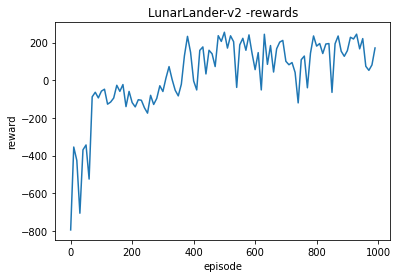

In [28]:
# list_tests_2 = list_tests_2[:len(np.arange(0,nb_episode,test_frequency))]

plt.figure()
plt.title("LunarLander-v2 -rewards")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_2)
plt.show()

## DQN with Experience Replay Buffer and Target Network

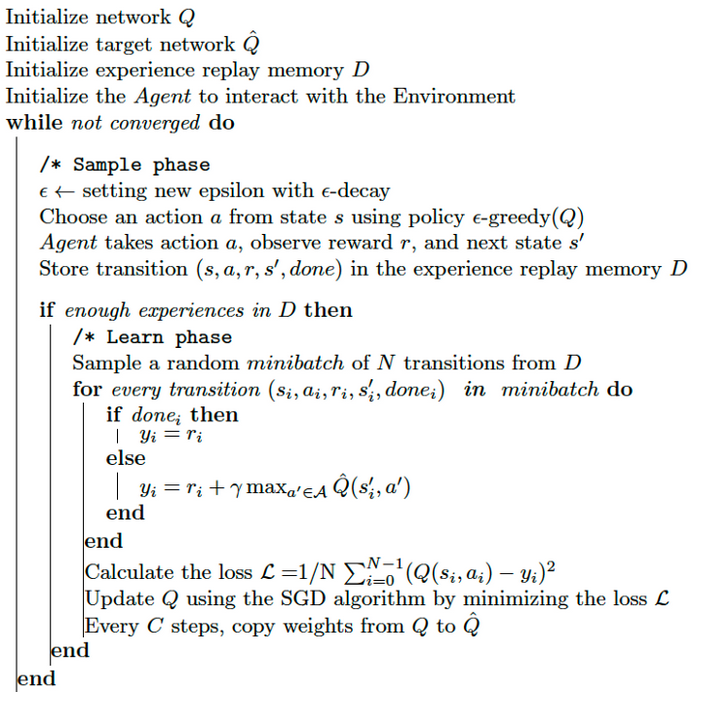

In [29]:
nb_episode = 1000

discount_factor = 0.99
learning_rate = 2e-4
test_frequency = 10
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.02
batch_size = 64
size_replay_buffer = int(1e5)
update_frequency = 1

tau = 1e-3 

In [30]:
replay_buffer = deque(maxlen=size_replay_buffer)
q_network = QNetwork(nb_actions,nb_observations)
q_target_network = QNetwork(nb_actions,nb_observations)
q_target_network.load_state_dict(q_network.state_dict())
optimizer = torch.optim.Adam(q_network.parameters(), lr=learning_rate)
list_tests_3 = []
average_list = deque(maxlen=100)
timestep = 0


for episode in tqdm(range(nb_episode)) :
    
    
    state = env.reset()
    done = False
    cumul = 0
    epsilon = max(epsilon * epsilon_decay,epsilon_min)
    
    while not done : 
        state_t = torch.as_tensor(state , dtype = torch.float32)
        
        if random.random() > epsilon :
            action = torch.argmax(q_network(state_t)).item()
        else :
            action = env.action_space.sample()
            
        new_state,reward,done,_ = env.step(action)
        cumul += reward
        
        
        transition = (state,action,done,reward,new_state)
        replay_buffer.append(transition)
        
        if len(replay_buffer) >= batch_size and timestep % update_frequency == 0 :
        
            
            batch = random.sample(replay_buffer,batch_size)

            states = np.asarray([exp[0] for exp in batch],dtype=np.float32)
            actions = np.asarray([exp[1] for exp in batch],dtype=int)
            dones = np.asarray([exp[2] for exp in batch],dtype=int)
            rewards = np.asarray([exp[3] for exp in batch],dtype=np.float32)
            new_states = np.asarray([exp[4] for exp in batch],dtype=np.float32)

            
            states_t = torch.as_tensor(states , dtype=torch.float32)
            dones_t = torch.as_tensor(dones , dtype = torch.int64)
            new_states_t = torch.as_tensor(new_states , dtype=torch.float32)
            actions_t = torch.as_tensor(actions , dtype = torch.int64).unsqueeze(1)
            rewards_t = torch.as_tensor(rewards , dtype=torch.float32)
            
            y_target = rewards_t + discount_factor * (1 - dones_t) * torch.max(q_target_network(new_states_t),dim=1)[0].detach()

            mse = nn.MSELoss()

            loss = mse(torch.gather(q_network(states_t),dim=1,index=actions_t), y_target.unsqueeze(1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            for target_param, local_param in zip(q_target_network.parameters(), q_network.parameters()):
                target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)  
                
        timestep += 1
        
        state = new_state
    
    average_list.append(cumul)
    
    if episode % test_frequency == 0 :
        t =  0
        for _ in range(10) :
            t += test(q_network)
        t /= 10
        avg = sum(average_list) / len(average_list)
        print(f"episode {episode} - test reward : {t} - avg : {avg} - epsilon {epsilon}")
        list_tests_3.append(t)

  0%|                                          | 1/1000 [00:00<11:27,  1.45it/s]

episode 0 - test reward : -1005.691717141541 - avg : -207.74532638540933 - epsilon 0.995


  1%|▍                                        | 12/1000 [00:03<04:24,  3.74it/s]

episode 10 - test reward : -167.02802119393886 - avg : -307.44103000121044 - epsilon 0.946354579813443


  2%|▉                                        | 22/1000 [00:06<05:25,  3.00it/s]

episode 20 - test reward : -186.8197825947684 - avg : -238.4830684512627 - epsilon 0.9000874278732445


  3%|█▎                                       | 31/1000 [00:09<12:09,  1.33it/s]

episode 30 - test reward : -238.68238066710995 - avg : -209.46515535088915 - epsilon 0.8560822709551227


  4%|█▋                                       | 41/1000 [00:16<25:56,  1.62s/it]

episode 40 - test reward : -253.98795360448207 - avg : -197.34623797157622 - epsilon 0.8142285204175609


  5%|██                                       | 51/1000 [00:24<29:16,  1.85s/it]

episode 50 - test reward : -148.80290404433327 - avg : -183.2458180822512 - epsilon 0.7744209942832988


  6%|██▌                                      | 61/1000 [00:34<37:47,  2.42s/it]

episode 60 - test reward : -333.5437949774929 - avg : -172.1337607922073 - epsilon 0.736559652908221


  7%|██▊                                    | 71/1000 [00:51<1:13:30,  4.75s/it]

episode 70 - test reward : -181.39141316780652 - avg : -169.6769561757965 - epsilon 0.7005493475733617


  8%|███▏                                   | 81/1000 [01:09<1:13:31,  4.80s/it]

episode 80 - test reward : -136.76089970472515 - avg : -159.9589479839749 - epsilon 0.6662995813682115


  9%|███▊                                     | 92/1000 [01:28<56:42,  3.75s/it]

episode 90 - test reward : -143.85893103556427 - avg : -152.87042867554976 - epsilon 0.6337242817644086


 10%|███▊                                  | 101/1000 [01:47<1:18:49,  5.26s/it]

episode 100 - test reward : -153.9157856144986 - avg : -145.10528283577167 - epsilon 0.6027415843082742


 11%|████▍                                   | 111/1000 [02:02<43:28,  2.93s/it]

episode 110 - test reward : -184.56694288424717 - avg : -118.9955523962837 - epsilon 0.5732736268885887


 12%|████▊                                   | 121/1000 [02:16<52:09,  3.56s/it]

episode 120 - test reward : -124.36125874140382 - avg : -113.81407384360264 - epsilon 0.5452463540625918


 13%|████▉                                 | 131/1000 [02:36<1:12:25,  5.00s/it]

episode 130 - test reward : -142.38404847979518 - avg : -107.41827285561338 - epsilon 0.5185893309484582


 14%|█████▎                                | 141/1000 [02:58<1:02:04,  4.34s/it]

episode 140 - test reward : -114.37851981989395 - avg : -97.08670312075589 - epsilon 0.4932355662165453


 15%|█████▋                                | 151/1000 [03:18<1:01:27,  4.34s/it]

episode 150 - test reward : -143.00482794615885 - avg : -91.41429645560811 - epsilon 0.46912134373457726


 16%|██████                                | 161/1000 [03:46<1:22:50,  5.92s/it]

episode 160 - test reward : -65.73153742669729 - avg : -85.21218829495338 - epsilon 0.446186062443672


 17%|██████▍                               | 171/1000 [04:10<1:16:22,  5.53s/it]

episode 170 - test reward : -21.905722681424187 - avg : -74.2944938279814 - epsilon 0.42437208406280985


 18%|██████▉                               | 181/1000 [04:47<1:19:45,  5.84s/it]

episode 180 - test reward : -57.09162118051709 - avg : -65.85427771847043 - epsilon 0.4036245882390106


 19%|███████▎                              | 191/1000 [05:32<1:45:27,  7.82s/it]

episode 190 - test reward : -44.215596545533266 - avg : -55.02353702412226 - epsilon 0.38389143477919885


 20%|███████▋                              | 201/1000 [06:09<1:14:39,  5.61s/it]

episode 200 - test reward : 113.44693858612902 - avg : -46.95695271234708 - epsilon 0.36512303261753626


 21%|████████                              | 211/1000 [06:51<1:31:53,  6.99s/it]

episode 210 - test reward : 30.952826352302424 - avg : -40.676149479033654 - epsilon 0.3472722151889232


 22%|████████▍                             | 221/1000 [07:28<1:07:59,  5.24s/it]

episode 220 - test reward : 72.78565328929213 - avg : -26.61704571442569 - epsilon 0.3302941218954743


 23%|████████▊                             | 231/1000 [08:06<1:16:46,  5.99s/it]

episode 230 - test reward : 13.073325348278829 - avg : -18.152171815867497 - epsilon 0.3141460853680822


 24%|█████████▏                            | 241/1000 [08:45<1:06:30,  5.26s/it]

episode 240 - test reward : 114.90576978359884 - avg : -3.4426951083199047 - epsilon 0.2987875242397482


 25%|██████████                              | 251/1000 [09:18<55:09,  4.42s/it]

episode 250 - test reward : 150.22401567641595 - avg : 11.27069548761287 - epsilon 0.28417984116121187


 26%|█████████▉                            | 261/1000 [09:59<1:10:05,  5.69s/it]

episode 260 - test reward : 129.25608862783264 - avg : 21.63169936761317 - epsilon 0.2702863258025825


 27%|██████████▎                           | 271/1000 [10:38<1:12:34,  5.97s/it]

episode 270 - test reward : 143.87944340706707 - avg : 34.93016163485947 - epsilon 0.2570720625972084


 28%|██████████▋                           | 281/1000 [11:19<1:13:40,  6.15s/it]

episode 280 - test reward : 144.33576170594273 - avg : 49.68974400971479 - epsilon 0.24450384299593592


 29%|███████████▋                            | 291/1000 [11:55<55:59,  4.74s/it]

episode 290 - test reward : 182.00188913034282 - avg : 66.1901893783292 - epsilon 0.23255008201124722


 30%|███████████▍                          | 301/1000 [12:37<1:10:57,  6.09s/it]

episode 300 - test reward : 143.02357929217777 - avg : 82.16158711083204 - epsilon 0.2211807388415433


 31%|███████████▊                          | 311/1000 [13:18<1:07:54,  5.91s/it]

episode 310 - test reward : 153.1091750220067 - avg : 92.02562569115955 - epsilon 0.21036724137609603


 32%|████████████▏                         | 321/1000 [13:58<1:07:36,  5.97s/it]

episode 320 - test reward : 164.59240739445653 - avg : 106.70347006994427 - epsilon 0.2000824143909432


 33%|█████████████▏                          | 331/1000 [14:33<54:39,  4.90s/it]

episode 330 - test reward : 136.67035367571148 - avg : 122.45686711090767 - epsilon 0.1903004112552766


 34%|█████████████▋                          | 341/1000 [15:05<49:24,  4.50s/it]

episode 340 - test reward : 188.6957599185817 - avg : 125.13049336136002 - epsilon 0.18099664897669618


 35%|██████████████                          | 351/1000 [15:32<37:26,  3.46s/it]

episode 350 - test reward : 230.82043450484875 - avg : 135.179797547932 - epsilon 0.17214774642209296


 36%|██████████████▍                         | 361/1000 [15:54<31:54,  3.00s/it]

episode 360 - test reward : 93.45050119061617 - avg : 153.83173827305438 - epsilon 0.16373146555890544


 37%|██████████████▊                         | 371/1000 [16:11<22:18,  2.13s/it]

episode 370 - test reward : 244.64325175505275 - avg : 162.06743118031318 - epsilon 0.1557266555690826


 38%|███████████████▏                        | 381/1000 [16:32<26:42,  2.59s/it]

episode 380 - test reward : 227.94916607857778 - avg : 171.1132127594183 - epsilon 0.14811319969530845


 39%|███████████████▋                        | 391/1000 [16:49<25:30,  2.51s/it]

episode 390 - test reward : 206.77234098615494 - avg : 178.23737852253385 - epsilon 0.14087196468590776


 40%|████████████████                        | 401/1000 [17:06<22:11,  2.22s/it]

episode 400 - test reward : 231.39393036820405 - avg : 183.17432103020784 - epsilon 0.13398475271138335


 41%|████████████████▍                       | 411/1000 [17:25<21:21,  2.18s/it]

episode 410 - test reward : 216.34739389394667 - avg : 197.23394132800462 - epsilon 0.12743425563174798


 42%|████████████████▊                       | 421/1000 [17:44<28:01,  2.90s/it]

episode 420 - test reward : 204.88010289536092 - avg : 201.76673897099002 - epsilon 0.12120401149972035


 43%|█████████████████▏                      | 431/1000 [18:04<27:08,  2.86s/it]

episode 430 - test reward : 212.04385386870823 - avg : 208.25163920452826 - epsilon 0.11527836319047392


 44%|█████████████████▋                      | 441/1000 [18:17<15:06,  1.62s/it]

episode 440 - test reward : 231.50098229564415 - avg : 217.48402245388178 - epsilon 0.10964241905397228


 45%|██████████████████                      | 451/1000 [18:35<30:24,  3.32s/it]

episode 450 - test reward : 148.52752251343637 - avg : 224.49036063534476 - epsilon 0.1042820154910064


 46%|██████████████████▍                     | 461/1000 [18:46<13:36,  1.51s/it]

episode 460 - test reward : 195.867009479608 - avg : 224.64307268146825 - epsilon 0.09918368135888474


 47%|██████████████████▊                     | 471/1000 [19:00<16:26,  1.87s/it]

episode 470 - test reward : 199.92221182520922 - avg : 233.0219533722441 - epsilon 0.0943346041173244


 48%|███████████████████▏                    | 481/1000 [19:11<14:50,  1.72s/it]

episode 480 - test reward : 239.87934024965708 - avg : 231.34539367304546 - epsilon 0.08972259762946533


 49%|███████████████████▋                    | 491/1000 [19:25<17:22,  2.05s/it]

episode 490 - test reward : 228.19696165598492 - avg : 229.0645127960546 - epsilon 0.08533607153708872


 50%|████████████████████                    | 501/1000 [19:38<12:27,  1.50s/it]

episode 500 - test reward : 231.7968983288441 - avg : 233.8148034141238 - epsilon 0.0811640021330769


 51%|████████████████████▍                   | 511/1000 [19:56<20:45,  2.55s/it]

episode 510 - test reward : 218.95906376596923 - avg : 228.19781493340463 - epsilon 0.07719590465791494


 52%|████████████████████▊                   | 521/1000 [20:09<13:50,  1.73s/it]

episode 520 - test reward : 213.93982383133394 - avg : 229.02669296438708 - epsilon 0.07342180695061275


 53%|█████████████████████▏                  | 531/1000 [20:24<17:42,  2.26s/it]

episode 530 - test reward : 228.2240983926819 - avg : 231.20538759444167 - epsilon 0.06983222438783


 54%|█████████████████████▋                  | 541/1000 [20:38<11:33,  1.51s/it]

episode 540 - test reward : 259.2058437237215 - avg : 234.49486505126362 - epsilon 0.06641813604822402


 55%|██████████████████████                  | 551/1000 [20:48<11:35,  1.55s/it]

episode 550 - test reward : 240.10708115294605 - avg : 234.8794946935142 - epsilon 0.06317096204211972


 56%|██████████████████████▍                 | 561/1000 [20:59<12:03,  1.65s/it]

episode 560 - test reward : 228.58921607215316 - avg : 236.19865396480836 - epsilon 0.06008254194952879


 57%|██████████████████████▊                 | 571/1000 [21:10<10:24,  1.46s/it]

episode 570 - test reward : 210.27871122634411 - avg : 234.16285097559 - epsilon 0.05714511431233153


 58%|███████████████████████▏                | 581/1000 [21:25<13:00,  1.86s/it]

episode 580 - test reward : 195.92138590738722 - avg : 234.88922520289486 - epsilon 0.0543512971290831


 59%|███████████████████████▋                | 591/1000 [21:40<16:04,  2.36s/it]

episode 590 - test reward : 215.28064438809028 - avg : 233.66365571993262 - epsilon 0.05169406930342616


 60%|████████████████████████                | 601/1000 [21:51<10:30,  1.58s/it]

episode 600 - test reward : 248.6559345208635 - avg : 228.04052239121287 - epsilon 0.04916675299948831


 61%|████████████████████████▍               | 611/1000 [22:02<09:40,  1.49s/it]

episode 610 - test reward : 233.31355316879376 - avg : 234.07368735164255 - epsilon 0.04676299685992172


 62%|████████████████████████▊               | 621/1000 [22:14<11:22,  1.80s/it]

episode 620 - test reward : 232.3717222175357 - avg : 234.16638140441617 - epsilon 0.04447676004441063


 63%|█████████████████████████▏              | 631/1000 [22:27<10:31,  1.71s/it]

episode 630 - test reward : 231.61293822421257 - avg : 234.584292366924 - epsilon 0.04230229704853423


 64%|█████████████████████████▋              | 641/1000 [22:37<07:00,  1.17s/it]

episode 640 - test reward : 203.05536959769614 - avg : 233.97131962941347 - epsilon 0.04023414326483323


 65%|██████████████████████████              | 651/1000 [22:49<10:07,  1.74s/it]

episode 650 - test reward : 246.84405725521475 - avg : 234.34802898626072 - epsilon 0.03826710124979409


 66%|██████████████████████████▍             | 661/1000 [23:00<09:50,  1.74s/it]

episode 660 - test reward : 228.3513674729117 - avg : 234.77575051908417 - epsilon 0.036396227662238566


 67%|██████████████████████████▊             | 671/1000 [23:12<10:02,  1.83s/it]

episode 670 - test reward : 236.7924885838372 - avg : 237.65310160408157 - epsilon 0.03461682084029365


 68%|███████████████████████████▏            | 681/1000 [23:22<08:07,  1.53s/it]

episode 680 - test reward : 247.84396516919915 - avg : 241.09832145515887 - epsilon 0.032924408985721944


 69%|███████████████████████████▋            | 691/1000 [23:33<09:27,  1.84s/it]

episode 690 - test reward : 230.3656838322482 - avg : 244.0044692926944 - epsilon 0.03131473892591842


 70%|████████████████████████████            | 701/1000 [23:41<04:53,  1.02it/s]

episode 700 - test reward : 282.2095459578355 - avg : 251.0045017129231 - epsilon 0.029783765425331846


 71%|████████████████████████████▍           | 711/1000 [23:51<04:45,  1.01it/s]

episode 710 - test reward : 264.68733051717356 - avg : 251.77153642546557 - epsilon 0.02832764101944931


 72%|████████████████████████████▊           | 721/1000 [24:00<05:23,  1.16s/it]

episode 720 - test reward : 247.0115863489293 - avg : 255.14797026594547 - epsilon 0.02694270634579598


 73%|█████████████████████████████▏          | 731/1000 [24:09<06:04,  1.35s/it]

episode 730 - test reward : 243.01766877286605 - avg : 256.63054049654426 - epsilon 0.02562548094765099


 74%|█████████████████████████████▋          | 741/1000 [24:21<07:02,  1.63s/it]

episode 740 - test reward : 237.80701301811678 - avg : 259.295556781149 - epsilon 0.02437265452736848


 75%|██████████████████████████████          | 751/1000 [24:31<05:23,  1.30s/it]

episode 750 - test reward : 244.644749201393 - avg : 260.2243167434179 - epsilon 0.023181078627322618


 76%|██████████████████████████████▍         | 761/1000 [24:42<07:13,  1.81s/it]

episode 760 - test reward : 209.82513496414336 - avg : 261.4806325067115 - epsilon 0.022047758717570132


 77%|██████████████████████████████▊         | 771/1000 [24:54<06:52,  1.80s/it]

episode 770 - test reward : 245.65850398247022 - avg : 261.4966693514232 - epsilon 0.020969846670345987


 78%|███████████████████████████████▏        | 781/1000 [25:03<05:09,  1.41s/it]

episode 780 - test reward : 243.68516164617137 - avg : 259.89270085835307 - epsilon 0.02


 79%|███████████████████████████████▋        | 791/1000 [25:12<04:03,  1.17s/it]

episode 790 - test reward : 242.52760070614454 - avg : 261.35781308854934 - epsilon 0.02


 80%|████████████████████████████████        | 801/1000 [25:20<04:05,  1.23s/it]

episode 800 - test reward : 257.43725774590115 - avg : 257.7213458122368 - epsilon 0.02


 81%|████████████████████████████████▍       | 811/1000 [25:29<04:03,  1.29s/it]

episode 810 - test reward : 248.31223816489714 - avg : 257.76979444645406 - epsilon 0.02


 82%|████████████████████████████████▊       | 821/1000 [25:37<02:52,  1.04it/s]

episode 820 - test reward : 242.9526413690421 - avg : 257.96483263498743 - epsilon 0.02


 83%|█████████████████████████████████▏      | 831/1000 [25:45<03:36,  1.28s/it]

episode 830 - test reward : 246.61958672772752 - avg : 258.45777827899815 - epsilon 0.02


 84%|█████████████████████████████████▋      | 841/1000 [25:56<04:30,  1.70s/it]

episode 840 - test reward : 211.59674334753853 - avg : 257.5928661001688 - epsilon 0.02


 85%|██████████████████████████████████      | 851/1000 [26:04<02:18,  1.08it/s]

episode 850 - test reward : 269.2984407278941 - avg : 257.13938350593963 - epsilon 0.02


 86%|██████████████████████████████████▍     | 861/1000 [26:14<02:36,  1.12s/it]

episode 860 - test reward : 257.134972696047 - avg : 255.5369465300666 - epsilon 0.02


 87%|██████████████████████████████████▊     | 871/1000 [26:23<03:17,  1.53s/it]

episode 870 - test reward : 216.12862293408148 - avg : 256.48564871723283 - epsilon 0.02


 88%|███████████████████████████████████▏    | 881/1000 [26:30<01:39,  1.20it/s]

episode 880 - test reward : 239.1222709336176 - avg : 258.3897573751641 - epsilon 0.02


 89%|███████████████████████████████████▋    | 891/1000 [26:39<02:38,  1.46s/it]

episode 890 - test reward : 194.0715665147709 - avg : 259.5215545436217 - epsilon 0.02


 90%|████████████████████████████████████    | 901/1000 [26:47<02:00,  1.22s/it]

episode 900 - test reward : 254.09194549071435 - avg : 263.06054551107496 - epsilon 0.02


 91%|████████████████████████████████████▍   | 911/1000 [26:55<01:31,  1.03s/it]

episode 910 - test reward : 221.46088775249683 - avg : 261.2491452701934 - epsilon 0.02


 92%|████████████████████████████████████▊   | 921/1000 [27:03<01:06,  1.18it/s]

episode 920 - test reward : 238.8280670391617 - avg : 260.6105325938232 - epsilon 0.02


 93%|█████████████████████████████████████▏  | 931/1000 [27:11<01:22,  1.20s/it]

episode 930 - test reward : 191.64499994632646 - avg : 259.334444715996 - epsilon 0.02


 94%|█████████████████████████████████████▋  | 941/1000 [27:19<00:57,  1.03it/s]

episode 940 - test reward : 254.97560429838026 - avg : 261.2331271867587 - epsilon 0.02


 95%|██████████████████████████████████████  | 951/1000 [27:30<01:17,  1.59s/it]

episode 950 - test reward : 242.7309999313339 - avg : 262.9626620443637 - epsilon 0.02


 96%|██████████████████████████████████████▍ | 961/1000 [27:38<00:37,  1.03it/s]

episode 960 - test reward : 253.64810059713008 - avg : 264.6632371758398 - epsilon 0.02


 97%|██████████████████████████████████████▊ | 971/1000 [27:48<00:38,  1.32s/it]

episode 970 - test reward : 271.4118211007017 - avg : 262.29997069322985 - epsilon 0.02


 98%|███████████████████████████████████████▏| 981/1000 [27:56<00:22,  1.20s/it]

episode 980 - test reward : 248.92604045106427 - avg : 261.6964427992193 - epsilon 0.02


 99%|███████████████████████████████████████▋| 991/1000 [28:04<00:09,  1.11s/it]

episode 990 - test reward : 251.18389324512637 - avg : 260.0155697048339 - epsilon 0.02


100%|███████████████████████████████████████| 1000/1000 [28:10<00:00,  1.69s/it]


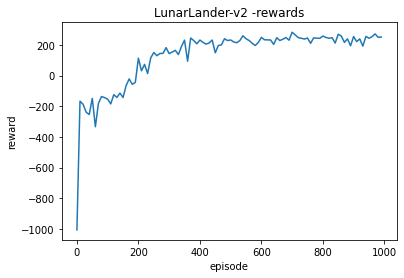

In [31]:
plt.figure()
plt.title("LunarLander-v2 -rewards")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_3)
plt.show()

## Double DQN with Experience Replay Buffer and Target Network

https://arxiv.org/pdf/1509.06461v3.pdf

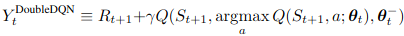

In [32]:
nb_episode = 1000

discount_factor = 0.99
learning_rate = 2e-4
test_frequency = 10
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.02
batch_size = 64
size_replay_buffer = int(1e5)
update_frequency = 1

tau = 1e-3 

In [33]:
replay_buffer = deque(maxlen=size_replay_buffer)
q_network = QNetwork(nb_actions,nb_observations)
q_target_network = QNetwork(nb_actions,nb_observations)
q_target_network.load_state_dict(q_network.state_dict())
optimizer = torch.optim.Adam(q_network.parameters(), lr=learning_rate)
list_tests_4 = []
timestep = 0
average_list = deque(maxlen=100)

for episode in tqdm(range(nb_episode)) :
    
    state = env.reset()
    done = False
    cumul = 0
    epsilon = max(epsilon * epsilon_decay,epsilon_min)
    
    while not done : 
        
        state_t = torch.as_tensor(state , dtype = torch.float32)
        
        if random.random() > epsilon :
            action = torch.argmax(q_network(state_t)).item()
        else :
            action = env.action_space.sample()
            
        new_state,reward,done,_ = env.step(action)
        cumul += reward
        
        transition = (state,action,done,reward,new_state)
        replay_buffer.append(transition)
        
        if len(replay_buffer) >= batch_size and timestep % update_frequency == 0:
        
            batch = random.sample(replay_buffer,batch_size)

            states = np.asarray([exp[0] for exp in batch],dtype=np.float32)
            actions = np.asarray([exp[1] for exp in batch],dtype=int)
            dones = np.asarray([exp[2] for exp in batch],dtype=int)
            rewards = np.asarray([exp[3] for exp in batch],dtype=np.float32)
            new_states = np.asarray([exp[4] for exp in batch],dtype=np.float32)
            
            states_t = torch.as_tensor(states , dtype=torch.float32)
            dones_t = torch.as_tensor(dones , dtype = torch.int64).unsqueeze(1)
            new_states_t = torch.as_tensor(new_states , dtype=torch.float32)
            actions_t = torch.as_tensor(actions , dtype = torch.int64).unsqueeze(1)
            rewards_t = torch.as_tensor(rewards , dtype=torch.float32).unsqueeze(1)
            
            
            y_target = rewards_t + discount_factor * (1 - dones_t) * torch.gather(q_target_network(new_states_t),dim=1,index=torch.argmax(q_network(new_states_t),dim=1).unsqueeze(1)).detach()

            mse = nn.MSELoss()

            loss = mse(torch.gather(q_network(states_t),dim=1,index=actions_t), y_target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            for target_param, local_param in zip(q_target_network.parameters(), q_network.parameters()):
                target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)  
                
            timestep += 1
        
        state = new_state
        
    
    average_list.append(cumul)
    
    if episode % test_frequency == 0 :
        t =  0
        for _ in range(10) :
            t += test(q_network)
        t /= 10
        avg = sum(average_list) / len(average_list)
        print(f"episode {episode} - test reward : {t} - avg : {avg} - epsilon {epsilon}")
        list_tests_4.append(t)

  0%|                                          | 2/1000 [00:00<03:29,  4.77it/s]

episode 0 - test reward : -729.8736224675704 - avg : -181.46668869772662 - epsilon 0.995


  1%|▍                                        | 12/1000 [00:03<05:14,  3.14it/s]

episode 10 - test reward : -215.47173653681162 - avg : -171.6701879390641 - epsilon 0.946354579813443


  2%|▊                                        | 21/1000 [00:13<40:18,  2.47s/it]

episode 20 - test reward : -202.53645178790765 - avg : -166.9136416688393 - epsilon 0.9000874278732445


  3%|█▎                                       | 31/1000 [00:20<24:05,  1.49s/it]

episode 30 - test reward : -441.6633512369356 - avg : -170.45950755105395 - epsilon 0.8560822709551227


  4%|█▋                                       | 41/1000 [00:24<12:03,  1.33it/s]

episode 40 - test reward : -225.08717178416615 - avg : -165.72852743597144 - epsilon 0.8142285204175609


  5%|██                                       | 51/1000 [00:33<31:26,  1.99s/it]

episode 50 - test reward : -141.32549573062846 - avg : -167.48652832904878 - epsilon 0.7744209942832988


  6%|██▌                                      | 61/1000 [00:38<12:40,  1.23it/s]

episode 60 - test reward : -264.13668753885815 - avg : -164.25347362480977 - epsilon 0.736559652908221


  7%|██▉                                      | 71/1000 [00:42<07:47,  1.99it/s]

episode 70 - test reward : -267.86782677626957 - avg : -161.27269886847398 - epsilon 0.7005493475733617


  8%|███▎                                     | 81/1000 [00:50<25:59,  1.70s/it]

episode 80 - test reward : -327.26890926531314 - avg : -151.9283317776171 - epsilon 0.6662995813682115


  9%|███▋                                     | 91/1000 [00:54<09:39,  1.57it/s]

episode 90 - test reward : -354.2094529301633 - avg : -148.25652072740272 - epsilon 0.6337242817644086


 10%|████                                    | 101/1000 [01:02<29:44,  1.98s/it]

episode 100 - test reward : -444.2646458310599 - avg : -140.37689144950826 - epsilon 0.6027415843082742


 11%|████▍                                   | 111/1000 [01:07<11:46,  1.26it/s]

episode 110 - test reward : -218.38590059464042 - avg : -128.32258192143897 - epsilon 0.5732736268885887


 12%|████▊                                   | 121/1000 [01:14<18:04,  1.23s/it]

episode 120 - test reward : -125.48336529852688 - avg : -118.21279425976972 - epsilon 0.5452463540625918


 13%|█████▏                                  | 131/1000 [01:23<26:35,  1.84s/it]

episode 130 - test reward : -281.749759562975 - avg : -104.45263210889806 - epsilon 0.5185893309484582


 14%|█████▋                                  | 141/1000 [01:32<26:13,  1.83s/it]

episode 140 - test reward : -123.26067058336389 - avg : -90.9155602233843 - epsilon 0.4932355662165453


 15%|██████                                  | 151/1000 [01:39<20:59,  1.48s/it]

episode 150 - test reward : -133.91946292074834 - avg : -76.9364771467137 - epsilon 0.46912134373457726


 16%|██████▍                                 | 161/1000 [01:52<24:47,  1.77s/it]

episode 160 - test reward : -174.83759585167962 - avg : -67.76860157480553 - epsilon 0.446186062443672


 17%|██████▊                                 | 171/1000 [02:03<19:05,  1.38s/it]

episode 170 - test reward : -50.80423333340151 - avg : -55.485679529506115 - epsilon 0.42437208406280985


 18%|███████▏                                | 181/1000 [02:20<29:28,  2.16s/it]

episode 180 - test reward : -47.12065215021578 - avg : -55.50934180205274 - epsilon 0.4036245882390106


 19%|███████▋                                | 191/1000 [02:40<33:21,  2.47s/it]

episode 190 - test reward : 7.942226845845451 - avg : -48.500141821871104 - epsilon 0.38389143477919885


 20%|███████▋                              | 201/1000 [03:11<1:21:12,  6.10s/it]

episode 200 - test reward : 13.430174182613797 - avg : -42.37577892720959 - epsilon 0.36512303261753626


 21%|████████▍                               | 211/1000 [03:24<37:16,  2.83s/it]

episode 210 - test reward : 154.15629817449116 - avg : -37.7217669979676 - epsilon 0.3472722151889232


 22%|████████▊                               | 221/1000 [03:47<45:04,  3.47s/it]

episode 220 - test reward : 191.8845101711529 - avg : -31.369443999515102 - epsilon 0.3302941218954743


 23%|████████▊                             | 231/1000 [04:13<1:02:56,  4.91s/it]

episode 230 - test reward : 28.91663322817191 - avg : -26.334783978606268 - epsilon 0.3141460853680822


 24%|█████████▋                              | 241/1000 [04:35<55:21,  4.38s/it]

episode 240 - test reward : 100.20830811525796 - avg : -26.040182596698795 - epsilon 0.2987875242397482


 25%|██████████                              | 251/1000 [05:03<52:48,  4.23s/it]

episode 250 - test reward : 118.40734575597612 - avg : -25.148805203999395 - epsilon 0.28417984116121187


 26%|██████████▍                             | 261/1000 [05:30<47:43,  3.88s/it]

episode 260 - test reward : -65.2968815062261 - avg : -22.950309632630475 - epsilon 0.2702863258025825


 27%|██████████▊                             | 271/1000 [06:00<49:53,  4.11s/it]

episode 270 - test reward : 126.30492893931998 - avg : -16.713373953985624 - epsilon 0.2570720625972084


 28%|███████████▏                            | 281/1000 [06:31<54:38,  4.56s/it]

episode 280 - test reward : 104.54238063075836 - avg : -1.5208326530723826 - epsilon 0.24450384299593592


 29%|███████████▋                            | 291/1000 [06:55<54:40,  4.63s/it]

episode 290 - test reward : 38.3052117492225 - avg : 5.156544696473883 - epsilon 0.23255008201124722


 30%|████████████                            | 301/1000 [07:16<38:12,  3.28s/it]

episode 300 - test reward : 144.5946707088061 - avg : -1.7088553463394538 - epsilon 0.2211807388415433


 31%|████████████▍                           | 311/1000 [07:34<28:05,  2.45s/it]

episode 310 - test reward : 49.73963040707661 - avg : 0.5741219211203085 - epsilon 0.21036724137609603


 32%|████████████▊                           | 321/1000 [08:04<49:39,  4.39s/it]

episode 320 - test reward : 145.0877144993886 - avg : 5.888230139075228 - epsilon 0.2000824143909432


 33%|█████████████▏                          | 331/1000 [08:36<48:06,  4.31s/it]

episode 330 - test reward : 104.25155905019115 - avg : 8.261471053046867 - epsilon 0.1903004112552766


 34%|█████████████▋                          | 341/1000 [08:57<30:25,  2.77s/it]

episode 340 - test reward : 194.71193577849155 - avg : 8.080880809862657 - epsilon 0.18099664897669618


 35%|██████████████                          | 351/1000 [09:29<40:52,  3.78s/it]

episode 350 - test reward : 41.232440342225956 - avg : 21.637396937452817 - epsilon 0.17214774642209296


 36%|██████████████▍                         | 361/1000 [09:55<33:11,  3.12s/it]

episode 360 - test reward : 61.39981872353386 - avg : 30.703948508363105 - epsilon 0.16373146555890544


 37%|██████████████▊                         | 371/1000 [10:28<52:38,  5.02s/it]

episode 370 - test reward : 45.98009920014105 - avg : 36.6058499566889 - epsilon 0.1557266555690826


 38%|███████████████▏                        | 381/1000 [10:48<29:05,  2.82s/it]

episode 380 - test reward : 204.70833894294861 - avg : 46.566419664203316 - epsilon 0.14811319969530845


 39%|███████████████▋                        | 391/1000 [11:13<41:25,  4.08s/it]

episode 390 - test reward : 1.239051222495221 - avg : 53.788733864922875 - epsilon 0.14087196468590776


 40%|████████████████                        | 401/1000 [11:32<30:36,  3.07s/it]

episode 400 - test reward : 195.21963348052185 - avg : 78.57904251646427 - epsilon 0.13398475271138335


 41%|████████████████▍                       | 411/1000 [11:52<25:32,  2.60s/it]

episode 410 - test reward : 96.53427350996927 - avg : 90.31244058852737 - epsilon 0.12743425563174798


 42%|████████████████▊                       | 421/1000 [12:11<27:14,  2.82s/it]

episode 420 - test reward : 103.60108330252808 - avg : 97.23017726735317 - epsilon 0.12120401149972035


 43%|█████████████████▏                      | 431/1000 [12:26<16:03,  1.69s/it]

episode 430 - test reward : 199.55697708817388 - avg : 116.51976698082095 - epsilon 0.11527836319047392


 44%|█████████████████▋                      | 441/1000 [12:51<33:06,  3.55s/it]

episode 440 - test reward : 160.75630441585017 - avg : 136.47696138892712 - epsilon 0.10964241905397228


 45%|██████████████████                      | 451/1000 [13:15<29:48,  3.26s/it]

episode 450 - test reward : 183.80464619488322 - avg : 143.81848853422918 - epsilon 0.1042820154910064


 46%|██████████████████▍                     | 461/1000 [13:27<12:27,  1.39s/it]

episode 460 - test reward : 122.37547129694974 - avg : 149.93327868179847 - epsilon 0.09918368135888474


 47%|██████████████████▊                     | 471/1000 [13:44<24:42,  2.80s/it]

episode 470 - test reward : 46.73484840362553 - avg : 160.18813085271734 - epsilon 0.0943346041173244


 48%|███████████████████▏                    | 481/1000 [14:01<27:04,  3.13s/it]

episode 480 - test reward : 105.72358519538918 - avg : 162.3661445137467 - epsilon 0.08972259762946533


 49%|███████████████████▋                    | 491/1000 [14:19<28:35,  3.37s/it]

episode 490 - test reward : 180.51535535568087 - avg : 172.15844408887915 - epsilon 0.08533607153708872


 50%|████████████████████                    | 501/1000 [14:33<15:42,  1.89s/it]

episode 500 - test reward : 216.24192184635794 - avg : 177.25827384490495 - epsilon 0.0811640021330769


 51%|████████████████████▍                   | 511/1000 [14:49<16:23,  2.01s/it]

episode 510 - test reward : 184.64727840959864 - avg : 174.08302196962458 - epsilon 0.07719590465791494


 52%|████████████████████▊                   | 521/1000 [15:01<11:24,  1.43s/it]

episode 520 - test reward : 187.3706481629502 - avg : 186.3246107218244 - epsilon 0.07342180695061275


 53%|█████████████████████▏                  | 531/1000 [15:14<11:30,  1.47s/it]

episode 530 - test reward : 247.78912842929284 - avg : 184.00195223488558 - epsilon 0.06983222438783


 54%|█████████████████████▋                  | 541/1000 [15:26<13:32,  1.77s/it]

episode 540 - test reward : 184.14531509486284 - avg : 184.8387307052669 - epsilon 0.06641813604822402


 55%|██████████████████████                  | 551/1000 [15:41<13:12,  1.76s/it]

episode 550 - test reward : 188.09168779403126 - avg : 188.11711811633725 - epsilon 0.06317096204211972


 56%|██████████████████████▍                 | 561/1000 [15:54<11:34,  1.58s/it]

episode 560 - test reward : 196.21256742005465 - avg : 199.33249709548622 - epsilon 0.06008254194952879


 57%|██████████████████████▊                 | 571/1000 [16:05<13:06,  1.83s/it]

episode 570 - test reward : 164.05008252167903 - avg : 204.22721800116207 - epsilon 0.05714511431233153


 58%|███████████████████████▏                | 581/1000 [16:16<07:27,  1.07s/it]

episode 580 - test reward : 256.4998200074971 - avg : 204.67795675812897 - epsilon 0.0543512971290831


 59%|███████████████████████▋                | 591/1000 [16:29<13:00,  1.91s/it]

episode 590 - test reward : 194.07200981024596 - avg : 208.3159229672843 - epsilon 0.05169406930342616


 60%|████████████████████████                | 601/1000 [16:39<07:29,  1.13s/it]

episode 600 - test reward : 95.42334088242374 - avg : 211.31468603547876 - epsilon 0.04916675299948831


 61%|████████████████████████▍               | 611/1000 [16:50<08:38,  1.33s/it]

episode 610 - test reward : 88.45147353188095 - avg : 221.44362591070217 - epsilon 0.04676299685992172


 62%|████████████████████████▊               | 621/1000 [16:57<05:39,  1.12it/s]

episode 620 - test reward : -25.21490487920547 - avg : 201.96196907336346 - epsilon 0.04447676004441063


 63%|█████████████████████████▏              | 631/1000 [17:03<04:25,  1.39it/s]

episode 630 - test reward : 110.58777810217188 - avg : 185.6923368894071 - epsilon 0.04230229704853423


 64%|█████████████████████████▋              | 641/1000 [17:24<25:58,  4.34s/it]

episode 640 - test reward : -82.7258870330668 - avg : 182.74814800163637 - epsilon 0.04023414326483323


 65%|██████████████████████████              | 651/1000 [17:34<09:54,  1.70s/it]

episode 650 - test reward : 116.93492304992648 - avg : 168.11296730005037 - epsilon 0.03826710124979409


 66%|██████████████████████████▍             | 661/1000 [17:44<07:23,  1.31s/it]

episode 660 - test reward : 38.369262345807954 - avg : 154.4725829087342 - epsilon 0.036396227662238566


 67%|██████████████████████████▊             | 671/1000 [17:52<04:02,  1.36it/s]

episode 670 - test reward : 65.46756996305571 - avg : 143.9884082490092 - epsilon 0.03461682084029365


 68%|███████████████████████████▏            | 681/1000 [18:00<05:25,  1.02s/it]

episode 680 - test reward : 46.62414035339452 - avg : 143.99940704473067 - epsilon 0.032924408985721944


 69%|███████████████████████████▋            | 691/1000 [18:11<08:20,  1.62s/it]

episode 690 - test reward : 215.28886480760093 - avg : 131.7396363332302 - epsilon 0.03131473892591842


 70%|████████████████████████████            | 701/1000 [18:25<12:25,  2.49s/it]

episode 700 - test reward : 160.97078382321578 - avg : 124.71530328902014 - epsilon 0.029783765425331846


 71%|████████████████████████████▍           | 711/1000 [18:36<07:33,  1.57s/it]

episode 710 - test reward : 124.42995596764226 - avg : 131.1019848354376 - epsilon 0.02832764101944931


 72%|████████████████████████████▊           | 721/1000 [18:45<05:09,  1.11s/it]

episode 720 - test reward : 136.14563598804858 - avg : 139.71597294137982 - epsilon 0.02694270634579598


 73%|█████████████████████████████▏          | 731/1000 [18:54<04:51,  1.08s/it]

episode 730 - test reward : 255.75310158644237 - avg : 156.01057886112358 - epsilon 0.02562548094765099


 74%|█████████████████████████████▋          | 741/1000 [19:02<04:42,  1.09s/it]

episode 740 - test reward : 213.10182565843974 - avg : 157.42137180954364 - epsilon 0.02437265452736848


 75%|██████████████████████████████          | 751/1000 [19:11<04:54,  1.18s/it]

episode 750 - test reward : 194.99236283066227 - avg : 168.8611854681507 - epsilon 0.023181078627322618


 76%|██████████████████████████████▍         | 761/1000 [19:25<07:39,  1.92s/it]

episode 760 - test reward : 199.15576746441025 - avg : 178.74355308738077 - epsilon 0.022047758717570132


 77%|██████████████████████████████▊         | 771/1000 [19:34<03:57,  1.04s/it]

episode 770 - test reward : 257.013677778992 - avg : 185.78242365529044 - epsilon 0.020969846670345987


 78%|███████████████████████████████▏        | 781/1000 [19:44<05:08,  1.41s/it]

episode 780 - test reward : 238.98386531683272 - avg : 192.94038577357531 - epsilon 0.02


 79%|███████████████████████████████▋        | 791/1000 [19:56<07:12,  2.07s/it]

episode 790 - test reward : 133.35036001399823 - avg : 204.96266523533046 - epsilon 0.02


 80%|████████████████████████████████        | 801/1000 [20:08<04:55,  1.49s/it]

episode 800 - test reward : 245.48715002970727 - avg : 212.88299216649696 - epsilon 0.02


 81%|████████████████████████████████▍       | 811/1000 [20:18<04:13,  1.34s/it]

episode 810 - test reward : 220.64670257798215 - avg : 206.06539106258245 - epsilon 0.02


 82%|████████████████████████████████▊       | 821/1000 [20:29<04:49,  1.62s/it]

episode 820 - test reward : 221.90974998272742 - avg : 209.73163584497001 - epsilon 0.02


 83%|█████████████████████████████████▏      | 831/1000 [20:40<04:19,  1.53s/it]

episode 830 - test reward : 231.03959200814012 - avg : 211.46043248292816 - epsilon 0.02


 84%|█████████████████████████████████▋      | 841/1000 [20:51<04:11,  1.58s/it]

episode 840 - test reward : 216.3604818583206 - avg : 218.9217600119023 - epsilon 0.02


 85%|██████████████████████████████████      | 851/1000 [21:00<03:08,  1.27s/it]

episode 850 - test reward : 261.419973905285 - avg : 220.71210621646216 - epsilon 0.02


 86%|██████████████████████████████████▍     | 861/1000 [21:08<02:21,  1.02s/it]

episode 860 - test reward : 219.01978462060407 - avg : 228.10352992927244 - epsilon 0.02


 87%|██████████████████████████████████▊     | 871/1000 [21:18<02:25,  1.13s/it]

episode 870 - test reward : 175.44038326647478 - avg : 233.2589013102081 - epsilon 0.02


 88%|███████████████████████████████████▏    | 881/1000 [21:26<02:08,  1.08s/it]

episode 880 - test reward : 244.22481234458846 - avg : 233.26824726879155 - epsilon 0.02


 89%|███████████████████████████████████▋    | 891/1000 [21:36<01:56,  1.07s/it]

episode 890 - test reward : 156.4917601535838 - avg : 236.68308579917638 - epsilon 0.02


 90%|████████████████████████████████████    | 901/1000 [21:46<02:37,  1.59s/it]

episode 900 - test reward : 246.03384121819622 - avg : 236.3865219720336 - epsilon 0.02


 91%|████████████████████████████████████▍   | 911/1000 [21:57<01:53,  1.28s/it]

episode 910 - test reward : 249.34927494086628 - avg : 242.85860772796408 - epsilon 0.02


 92%|████████████████████████████████████▊   | 921/1000 [22:05<01:41,  1.28s/it]

episode 920 - test reward : 246.62424703040193 - avg : 247.9713129291092 - epsilon 0.02


 93%|█████████████████████████████████████▏  | 931/1000 [22:13<01:08,  1.01it/s]

episode 930 - test reward : 238.31336795451384 - avg : 251.82864180548992 - epsilon 0.02


 94%|█████████████████████████████████████▋  | 941/1000 [22:21<01:07,  1.15s/it]

episode 940 - test reward : 202.86752074163965 - avg : 246.87708272988633 - epsilon 0.02


 95%|██████████████████████████████████████  | 951/1000 [22:30<01:06,  1.36s/it]

episode 950 - test reward : 248.67813608676443 - avg : 253.18985875832408 - epsilon 0.02


 96%|██████████████████████████████████████▍ | 961/1000 [22:38<00:37,  1.03it/s]

episode 960 - test reward : 259.58662483880914 - avg : 248.85534890698145 - epsilon 0.02


 97%|██████████████████████████████████████▊ | 971/1000 [22:50<01:02,  2.14s/it]

episode 970 - test reward : 157.3347742238047 - avg : 242.82609118122872 - epsilon 0.02


 98%|███████████████████████████████████████▏| 981/1000 [22:58<00:17,  1.10it/s]

episode 980 - test reward : 264.00673186234843 - avg : 239.767543319133 - epsilon 0.02


 99%|███████████████████████████████████████▋| 991/1000 [23:08<00:16,  1.82s/it]

episode 990 - test reward : 217.0567865569382 - avg : 234.09467859920366 - epsilon 0.02


100%|███████████████████████████████████████| 1000/1000 [23:16<00:00,  1.40s/it]


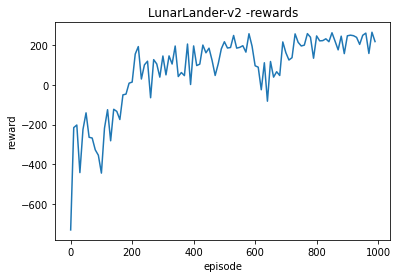

In [34]:
plt.figure()
plt.title("LunarLander-v2 -rewards")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_4)
plt.show()

## Dueling DQN with Experience Replay Buffer and Target Network

source : https://arxiv.org/pdf/1511.06581.pdf

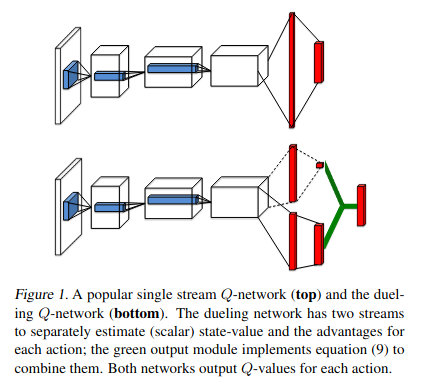

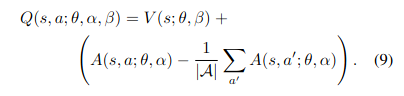

In [35]:
def test(q_network) :
    
    state = env.reset()
    done = False
    cum_sum = 0
    while not done :
        state_t = torch.as_tensor(state , dtype = torch.float32).unsqueeze(0)
        action = torch.argmax(q_network(state_t)).item()
        new_state,reward,done,_ = env.step(action)
        state = new_state
        cum_sum += reward
        
    return cum_sum

In [36]:
class DuelingQNetwork(nn.Module) :
    
    def __init__(self,
              nb_actions,
              nb_observations) : 
        
        super().__init__()
        self.nb_actions = nb_actions
        self.nb_observations = nb_observations
        
        self.net = nn.Sequential(
            nn.Linear(nb_observations,64),
            nn.ReLU(),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Linear(64,32)
        )
        
        self.net_advantage = nn.Sequential(
            nn.ReLU(),
            nn.Linear(32,nb_actions)
        )
        
        self.net_state_value = nn.Sequential(
            nn.ReLU(),
            nn.Linear(32,1)
        )
        
    def advantage(self,x) :
        return self.net_advantage(self.net(x))
    
    def state_value(self,x) :
        return self.net_state_value(self.net(x))
    
    def forward(self,x) :
        return self.state_value(x) + self.advantage(x) - torch.mean(self.advantage(x),dim=1).unsqueeze(1)

In [37]:
nb_episode = 1000

discount_factor = 0.99
learning_rate = 2e-4
test_frequency = 10
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.02
batch_size = 64
size_replay_buffer = int(1e5)
update_frequency = 1
tau = 1e-3 

In [38]:
replay_buffer = deque(maxlen=size_replay_buffer)
q_network = DuelingQNetwork(nb_actions,nb_observations)
q_target_network = DuelingQNetwork(nb_actions,nb_observations)
q_target_network.load_state_dict(q_network.state_dict())
optimizer = torch.optim.Adam(q_network.parameters(), lr=learning_rate)
list_tests_5 = []
timestep = 0

average_list = deque(maxlen=100)


for episode in tqdm(range(nb_episode)) :
    state = env.reset()
    done = False
    cumul = 0
    epsilon = max(epsilon * epsilon_decay,epsilon_min)
    
    while not done : 
        
        state_t = torch.as_tensor(state , dtype = torch.float32).unsqueeze(0)
        
        if random.random() > epsilon :
            action = torch.argmax(q_target_network(state_t)).item()
        else :
            action = env.action_space.sample()
            
        new_state,reward,done,_ = env.step(action)
        cumul += reward
        
        
        transition = (state,action,done,reward,new_state)
        replay_buffer.append(transition)
        
        if len(replay_buffer) >= batch_size and timestep % update_frequency == 0 :
            
            batch = random.sample(replay_buffer,batch_size)

            states = np.asarray([exp[0] for exp in batch],dtype=np.float32)
            actions = np.asarray([exp[1] for exp in batch],dtype=int)
            dones = np.asarray([exp[2] for exp in batch],dtype=int)
            rewards = np.asarray([exp[3] for exp in batch],dtype=np.float32)
            new_states = np.asarray([exp[4] for exp in batch],dtype=np.float32)

            
            states_t = torch.as_tensor(states , dtype=torch.float32)
            dones_t = torch.as_tensor(dones , dtype = torch.int64)
            new_states_t = torch.as_tensor(new_states , dtype=torch.float32)
            actions_t = torch.as_tensor(actions , dtype = torch.int64).unsqueeze(1)
            rewards_t = torch.as_tensor(rewards , dtype=torch.float32)
            
            y_target = rewards_t + discount_factor * (1 - dones_t) * torch.max(q_target_network(new_states_t),dim=1)[0].detach()

            mse = nn.MSELoss()

            loss = mse(torch.gather(q_network(states_t),dim=1,index=actions_t), y_target.unsqueeze(1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            for target_param, local_param in zip(q_target_network.parameters(), q_network.parameters()):
                target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)  
                
        timestep += 1
        
        state = new_state
        
    
    average_list.append(cumul)
    
    if episode % test_frequency == 0 :
        t =  0
        for _ in range(10) :
            t += test(q_network)
        t /= 10
        avg = sum(average_list) / len(average_list)
        print(f"episode {episode} - test reward : {t} - avg : {avg} - epsilon {epsilon}")
        list_tests_5.append(t)

  0%|                                          | 1/1000 [00:00<16:30,  1.01it/s]

episode 0 - test reward : -1094.701457157297 - avg : -106.09557107177203 - epsilon 0.995


  1%|▍                                        | 11/1000 [00:05<09:29,  1.74it/s]

episode 10 - test reward : -331.97760203176733 - avg : -188.1143319705886 - epsilon 0.946354579813443


  2%|▊                                        | 21/1000 [00:11<13:37,  1.20it/s]

episode 20 - test reward : -264.24800259240305 - avg : -203.39767006199733 - epsilon 0.9000874278732445


  3%|█▎                                       | 31/1000 [00:19<23:36,  1.46s/it]

episode 30 - test reward : -181.61941375321783 - avg : -201.49462944943588 - epsilon 0.8560822709551227


  4%|█▌                                     | 41/1000 [00:37<1:12:16,  4.52s/it]

episode 40 - test reward : -211.32982006714474 - avg : -191.57730638331162 - epsilon 0.8142285204175609


  5%|██                                       | 51/1000 [00:47<37:05,  2.35s/it]

episode 50 - test reward : -208.87183981646768 - avg : -176.19817215391535 - epsilon 0.7744209942832988


  6%|██▍                                    | 61/1000 [01:05<1:10:15,  4.49s/it]

episode 60 - test reward : -160.04789751919478 - avg : -168.07433315284956 - epsilon 0.736559652908221


  7%|██▊                                    | 71/1000 [01:25<1:17:54,  5.03s/it]

episode 70 - test reward : -153.1055728467499 - avg : -161.12369782914564 - epsilon 0.7005493475733617


  8%|███▎                                     | 81/1000 [01:37<44:43,  2.92s/it]

episode 80 - test reward : -191.4412990298031 - avg : -152.85109080408384 - epsilon 0.6662995813682115


  9%|███▌                                   | 91/1000 [01:58<1:18:46,  5.20s/it]

episode 90 - test reward : -140.140431308039 - avg : -145.60505907226732 - epsilon 0.6337242817644086


 10%|████                                    | 101/1000 [02:15<53:20,  3.56s/it]

episode 100 - test reward : -289.5435514972229 - avg : -138.67575173948725 - epsilon 0.6027415843082742


 11%|████▍                                   | 111/1000 [02:23<17:14,  1.16s/it]

episode 110 - test reward : -447.06262032749254 - avg : -125.72806053245033 - epsilon 0.5732736268885887


 12%|████▊                                   | 121/1000 [02:32<15:57,  1.09s/it]

episode 120 - test reward : -461.5943467178866 - avg : -110.30615901859966 - epsilon 0.5452463540625918


 13%|████▉                                 | 131/1000 [02:50<1:02:02,  4.28s/it]

episode 130 - test reward : -196.85029803830744 - avg : -93.29849195613943 - epsilon 0.5185893309484582


 14%|█████▋                                  | 141/1000 [03:11<35:17,  2.47s/it]

episode 140 - test reward : -178.4158231023469 - avg : -81.3668662175214 - epsilon 0.4932355662165453


 15%|██████                                  | 151/1000 [03:28<42:34,  3.01s/it]

episode 150 - test reward : -228.95670415152213 - avg : -76.20513881179183 - epsilon 0.46912134373457726


 16%|██████▍                                 | 161/1000 [03:40<29:05,  2.08s/it]

episode 160 - test reward : -104.35427963053966 - avg : -70.10285645023895 - epsilon 0.446186062443672


 17%|██████▊                                 | 171/1000 [03:51<25:42,  1.86s/it]

episode 170 - test reward : -220.06440110583804 - avg : -61.30738762632947 - epsilon 0.42437208406280985


 18%|███████▏                                | 181/1000 [04:17<39:04,  2.86s/it]

episode 180 - test reward : -98.89252856350507 - avg : -51.01742686078596 - epsilon 0.4036245882390106


 19%|███████▋                                | 191/1000 [04:40<45:54,  3.40s/it]

episode 190 - test reward : 5.357903146860354 - avg : -40.00862952782805 - epsilon 0.38389143477919885


 20%|████████                                | 201/1000 [05:05<39:15,  2.95s/it]

episode 200 - test reward : -76.12329894777974 - avg : -33.00048900094551 - epsilon 0.36512303261753626


 21%|████████▍                               | 211/1000 [05:21<41:41,  3.17s/it]

episode 210 - test reward : 28.21219967336453 - avg : -28.034863843107377 - epsilon 0.3472722151889232


 22%|████████▊                               | 221/1000 [05:52<42:22,  3.26s/it]

episode 220 - test reward : 28.065513050676664 - avg : -19.129547742633434 - epsilon 0.3302941218954743


 23%|█████████▏                              | 231/1000 [06:09<41:32,  3.24s/it]

episode 230 - test reward : 45.80748326635736 - avg : -14.705375103354626 - epsilon 0.3141460853680822


 24%|█████████▋                              | 241/1000 [06:25<24:01,  1.90s/it]

episode 240 - test reward : -28.59665687916675 - avg : -8.615508710202064 - epsilon 0.2987875242397482


 25%|█████████▌                            | 251/1000 [07:00<1:06:19,  5.31s/it]

episode 250 - test reward : 86.78997623866195 - avg : -5.20980183380641 - epsilon 0.28417984116121187


 26%|██████████▍                             | 261/1000 [07:13<22:55,  1.86s/it]

episode 260 - test reward : 54.121769757614594 - avg : -6.3078878032862145 - epsilon 0.2702863258025825


 27%|██████████▊                             | 271/1000 [07:45<44:44,  3.68s/it]

episode 270 - test reward : 141.07154516872396 - avg : 5.071877878332612 - epsilon 0.2570720625972084


 28%|███████████▏                            | 281/1000 [08:21<50:33,  4.22s/it]

episode 280 - test reward : 90.37104896523601 - avg : 10.685401791609916 - epsilon 0.24450384299593592


 29%|███████████▋                            | 291/1000 [09:03<46:20,  3.92s/it]

episode 290 - test reward : 118.05145846020949 - avg : 18.521801720753096 - epsilon 0.23255008201124722


 30%|████████████                            | 301/1000 [09:32<33:09,  2.85s/it]

episode 300 - test reward : 155.8418728796682 - avg : 31.853906999299312 - epsilon 0.2211807388415433


 31%|████████████▍                           | 311/1000 [10:04<28:18,  2.47s/it]

episode 310 - test reward : 122.8802767252754 - avg : 43.03272243314785 - epsilon 0.21036724137609603


 32%|████████████▊                           | 321/1000 [10:35<43:50,  3.87s/it]

episode 320 - test reward : 90.73367794015114 - avg : 53.42506046839009 - epsilon 0.2000824143909432


 33%|█████████████▏                          | 331/1000 [11:13<57:25,  5.15s/it]

episode 330 - test reward : 74.73879714347906 - avg : 66.42731962627177 - epsilon 0.1903004112552766


 34%|█████████████▋                          | 341/1000 [11:48<43:51,  3.99s/it]

episode 340 - test reward : 147.20886548368853 - avg : 76.44592984671792 - epsilon 0.18099664897669618


 35%|██████████████                          | 351/1000 [12:24<51:55,  4.80s/it]

episode 350 - test reward : -31.20638396428812 - avg : 100.37384951044541 - epsilon 0.17214774642209296


 36%|██████████████▍                         | 361/1000 [12:48<36:41,  3.44s/it]

episode 360 - test reward : 108.88310875965271 - avg : 122.89614355260066 - epsilon 0.16373146555890544


 37%|██████████████▊                         | 371/1000 [13:25<49:07,  4.69s/it]

episode 370 - test reward : 10.776985611834078 - avg : 126.22083467894299 - epsilon 0.1557266555690826


 38%|███████████████▏                        | 381/1000 [13:52<38:34,  3.74s/it]

episode 380 - test reward : 16.47342123748959 - avg : 133.6049930349226 - epsilon 0.14811319969530845


 39%|███████████████▋                        | 391/1000 [14:17<22:29,  2.22s/it]

episode 390 - test reward : 30.79161250704371 - avg : 131.8052137537654 - epsilon 0.14087196468590776


 40%|████████████████                        | 401/1000 [14:33<24:12,  2.42s/it]

episode 400 - test reward : 157.19154368520677 - avg : 128.75405561896537 - epsilon 0.13398475271138335


 41%|████████████████▍                       | 411/1000 [14:48<17:39,  1.80s/it]

episode 410 - test reward : -40.64850653634426 - avg : 128.6221023243867 - epsilon 0.12743425563174798


 42%|████████████████▊                       | 421/1000 [15:07<19:53,  2.06s/it]

episode 420 - test reward : 188.2010380852501 - avg : 129.29947809052052 - epsilon 0.12120401149972035


 43%|█████████████████▏                      | 431/1000 [15:25<16:55,  1.78s/it]

episode 430 - test reward : 21.44139930093336 - avg : 128.9026277195854 - epsilon 0.11527836319047392


 44%|█████████████████▋                      | 441/1000 [15:43<24:07,  2.59s/it]

episode 440 - test reward : 24.5188949543654 - avg : 131.48065580643325 - epsilon 0.10964241905397228


 45%|██████████████████                      | 451/1000 [16:07<20:41,  2.26s/it]

episode 450 - test reward : 107.60080795444996 - avg : 130.14070436137797 - epsilon 0.1042820154910064


 46%|██████████████████▍                     | 461/1000 [16:24<18:24,  2.05s/it]

episode 460 - test reward : 50.7579159144604 - avg : 130.2482411287829 - epsilon 0.09918368135888474


 47%|██████████████████▊                     | 471/1000 [16:41<15:19,  1.74s/it]

episode 470 - test reward : -41.89708532069275 - avg : 126.636219794253 - epsilon 0.0943346041173244


 48%|███████████████████▏                    | 481/1000 [16:57<16:52,  1.95s/it]

episode 480 - test reward : 43.230451880754046 - avg : 132.21958216886517 - epsilon 0.08972259762946533


 49%|███████████████████▋                    | 491/1000 [17:12<15:22,  1.81s/it]

episode 490 - test reward : -59.09574295171571 - avg : 128.52483201350265 - epsilon 0.08533607153708872


 50%|████████████████████                    | 501/1000 [17:25<09:29,  1.14s/it]

episode 500 - test reward : -38.638904931747334 - avg : 125.53210429141077 - epsilon 0.0811640021330769


 51%|████████████████████▍                   | 511/1000 [17:37<12:12,  1.50s/it]

episode 510 - test reward : 90.2979590694035 - avg : 122.13618732085331 - epsilon 0.07719590465791494


 52%|████████████████████▊                   | 521/1000 [17:46<08:22,  1.05s/it]

episode 520 - test reward : -77.61446032049328 - avg : 109.79744001819803 - epsilon 0.07342180695061275


 53%|█████████████████████▏                  | 531/1000 [17:54<06:50,  1.14it/s]

episode 530 - test reward : -47.10338692038569 - avg : 94.00411666313704 - epsilon 0.06983222438783


 54%|█████████████████████▋                  | 541/1000 [18:07<12:31,  1.64s/it]

episode 540 - test reward : 38.87664487697382 - avg : 71.69682315641614 - epsilon 0.06641813604822402


 55%|██████████████████████                  | 551/1000 [18:23<13:56,  1.86s/it]

episode 550 - test reward : 43.055140206169234 - avg : 57.95014934282777 - epsilon 0.06317096204211972


 56%|██████████████████████▍                 | 561/1000 [18:35<11:42,  1.60s/it]

episode 560 - test reward : 41.65582544932812 - avg : 43.11132773623277 - epsilon 0.06008254194952879


 57%|██████████████████████▊                 | 571/1000 [18:48<12:41,  1.77s/it]

episode 570 - test reward : 3.5850054202860804 - avg : 37.735872225419186 - epsilon 0.05714511431233153


 58%|███████████████████████▏                | 581/1000 [19:00<10:35,  1.52s/it]

episode 580 - test reward : 66.49986527141004 - avg : 22.644239714750125 - epsilon 0.0543512971290831


 59%|███████████████████████▋                | 591/1000 [19:12<10:08,  1.49s/it]

episode 590 - test reward : -41.96364255125356 - avg : 23.528708258769825 - epsilon 0.05169406930342616


 60%|████████████████████████                | 601/1000 [19:28<12:56,  1.95s/it]

episode 600 - test reward : 95.0317199283899 - avg : 26.207352073166472 - epsilon 0.04916675299948831


 61%|████████████████████████▍               | 611/1000 [19:44<12:22,  1.91s/it]

episode 610 - test reward : 74.08407193442414 - avg : 44.084407077129924 - epsilon 0.04676299685992172


 62%|████████████████████████▊               | 621/1000 [19:59<10:28,  1.66s/it]

episode 620 - test reward : 94.70689755868469 - avg : 56.71133764834254 - epsilon 0.04447676004441063


 63%|█████████████████████████▏              | 631/1000 [20:13<11:05,  1.80s/it]

episode 630 - test reward : 95.8078459741939 - avg : 57.58376205393412 - epsilon 0.04230229704853423


 64%|█████████████████████████▋              | 641/1000 [20:29<13:16,  2.22s/it]

episode 640 - test reward : -23.372681626445278 - avg : 74.48077367124837 - epsilon 0.04023414326483323


 65%|██████████████████████████              | 651/1000 [20:44<07:11,  1.24s/it]

episode 650 - test reward : -122.3652143192154 - avg : 91.25045303627284 - epsilon 0.03826710124979409


 66%|██████████████████████████▍             | 661/1000 [20:58<13:12,  2.34s/it]

episode 660 - test reward : -23.210885921903106 - avg : 102.72702994741353 - epsilon 0.036396227662238566


 67%|██████████████████████████▊             | 671/1000 [21:12<10:24,  1.90s/it]

episode 670 - test reward : 146.80076360256697 - avg : 120.32265937310764 - epsilon 0.03461682084029365


 68%|███████████████████████████▏            | 681/1000 [21:28<10:04,  1.90s/it]

episode 680 - test reward : 244.66403044724876 - avg : 136.87232971273397 - epsilon 0.032924408985721944


 69%|███████████████████████████▋            | 691/1000 [21:47<09:31,  1.85s/it]

episode 690 - test reward : 93.80759273631017 - avg : 148.48470155197205 - epsilon 0.03131473892591842


 70%|████████████████████████████            | 701/1000 [22:02<13:26,  2.70s/it]

episode 700 - test reward : 83.87833534159286 - avg : 147.85986022078222 - epsilon 0.029783765425331846


 71%|████████████████████████████▍           | 711/1000 [22:12<06:17,  1.31s/it]

episode 710 - test reward : 116.15726755169173 - avg : 125.6051340852247 - epsilon 0.02832764101944931


 72%|████████████████████████████▊           | 721/1000 [22:21<04:24,  1.06it/s]

episode 720 - test reward : -102.8262890740554 - avg : 121.33385263123282 - epsilon 0.02694270634579598


 73%|█████████████████████████████▏          | 731/1000 [22:32<07:23,  1.65s/it]

episode 730 - test reward : 44.97300127075893 - avg : 127.88465924174334 - epsilon 0.02562548094765099


 74%|█████████████████████████████▋          | 741/1000 [22:44<06:59,  1.62s/it]

episode 740 - test reward : 130.13812427041609 - avg : 127.73565968764909 - epsilon 0.02437265452736848


 75%|██████████████████████████████          | 751/1000 [22:56<04:44,  1.14s/it]

episode 750 - test reward : -33.17087075609931 - avg : 117.30787118743886 - epsilon 0.023181078627322618


 76%|██████████████████████████████▍         | 761/1000 [23:11<08:42,  2.18s/it]

episode 760 - test reward : 184.97662435886252 - avg : 124.90970912785559 - epsilon 0.022047758717570132


 77%|██████████████████████████████▊         | 771/1000 [23:34<16:15,  4.26s/it]

episode 770 - test reward : 101.30333218820434 - avg : 125.1620383906832 - epsilon 0.020969846670345987


 78%|███████████████████████████████▏        | 781/1000 [23:58<11:23,  3.12s/it]

episode 780 - test reward : 69.75079866078224 - avg : 123.57664902856285 - epsilon 0.02


 79%|███████████████████████████████▋        | 791/1000 [24:17<10:25,  2.99s/it]

episode 790 - test reward : 68.7593540308163 - avg : 122.70505961966977 - epsilon 0.02


 80%|████████████████████████████████        | 801/1000 [24:37<08:02,  2.42s/it]

episode 800 - test reward : 149.2175213072406 - avg : 122.84581366163737 - epsilon 0.02


 81%|████████████████████████████████▍       | 811/1000 [24:54<08:14,  2.62s/it]

episode 810 - test reward : 258.4356638110665 - avg : 140.0914064479478 - epsilon 0.02


 82%|████████████████████████████████▊       | 821/1000 [25:16<08:35,  2.88s/it]

episode 820 - test reward : 206.13532200637647 - avg : 151.23441161329782 - epsilon 0.02


 83%|█████████████████████████████████▏      | 831/1000 [25:31<04:36,  1.64s/it]

episode 830 - test reward : 191.77869298124278 - avg : 167.58825471359808 - epsilon 0.02


 84%|█████████████████████████████████▋      | 841/1000 [25:48<04:54,  1.85s/it]

episode 840 - test reward : 223.67008084984712 - avg : 180.72479128979523 - epsilon 0.02


 85%|██████████████████████████████████      | 851/1000 [26:06<05:27,  2.20s/it]

episode 850 - test reward : 28.971256940521698 - avg : 181.43066218750602 - epsilon 0.02


 86%|██████████████████████████████████▍     | 861/1000 [26:31<07:25,  3.20s/it]

episode 860 - test reward : -15.835013277049603 - avg : 169.44400093526855 - epsilon 0.02


 87%|██████████████████████████████████▊     | 871/1000 [27:04<09:51,  4.58s/it]

episode 870 - test reward : 88.21920481159671 - avg : 151.05794856100675 - epsilon 0.02


 88%|███████████████████████████████████▏    | 881/1000 [27:36<09:29,  4.78s/it]

episode 880 - test reward : 128.6116950271308 - avg : 136.28722244771404 - epsilon 0.02


 89%|███████████████████████████████████▋    | 891/1000 [28:04<06:56,  3.82s/it]

episode 890 - test reward : 180.87361654260815 - avg : 135.900890418007 - epsilon 0.02


 90%|████████████████████████████████████    | 901/1000 [28:32<05:46,  3.50s/it]

episode 900 - test reward : 144.48463780463393 - avg : 141.52567705002963 - epsilon 0.02


 91%|████████████████████████████████████▍   | 911/1000 [28:55<04:23,  2.96s/it]

episode 910 - test reward : -81.09263170254744 - avg : 139.85504123967226 - epsilon 0.02


 92%|████████████████████████████████████▊   | 921/1000 [29:25<05:35,  4.24s/it]

episode 920 - test reward : 44.47575288155072 - avg : 125.2483513114884 - epsilon 0.02


 93%|█████████████████████████████████████▏  | 931/1000 [29:52<04:51,  4.22s/it]

episode 930 - test reward : -107.59732043342191 - avg : 107.66306502379685 - epsilon 0.02


 94%|█████████████████████████████████████▋  | 941/1000 [30:28<04:51,  4.93s/it]

episode 940 - test reward : -1.890612215899091 - avg : 84.19771456280355 - epsilon 0.02


 95%|██████████████████████████████████████  | 951/1000 [30:51<01:54,  2.33s/it]

episode 950 - test reward : -28.85506698302193 - avg : 70.21973867566324 - epsilon 0.02


 96%|██████████████████████████████████████▍ | 961/1000 [31:16<02:27,  3.79s/it]

episode 960 - test reward : 16.42895240079593 - avg : 60.18652501046421 - epsilon 0.02


 97%|██████████████████████████████████████▊ | 971/1000 [31:47<02:06,  4.35s/it]

episode 970 - test reward : -18.30791090834833 - avg : 51.864373888501184 - epsilon 0.02


 98%|███████████████████████████████████████▏| 981/1000 [32:02<00:46,  2.45s/it]

episode 980 - test reward : -82.37302877421841 - avg : 38.98256367008292 - epsilon 0.02


 99%|███████████████████████████████████████▋| 991/1000 [32:22<00:22,  2.46s/it]

episode 990 - test reward : -69.52094523114755 - avg : 22.477559482417405 - epsilon 0.02


100%|███████████████████████████████████████| 1000/1000 [32:34<00:00,  1.95s/it]


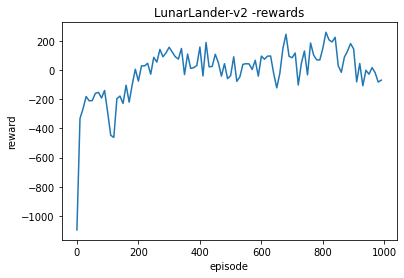

In [39]:
plt.figure()
plt.title("LunarLander-v2 -rewards")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_5)
plt.show()

## Dueling Double DQN with Experience Replay Buffer and Target Network (D3QN)

In [40]:
nb_episode = 1000

discount_factor = 0.99
learning_rate = 2e-4
test_frequency = 10
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.02
batch_size = 64
size_replay_buffer = int(1e5)
update_frequency = 1
tau = 1e-3 

In [41]:
replay_buffer = deque(maxlen=size_replay_buffer)
q_network = DuelingQNetwork(nb_actions,nb_observations)
q_target_network = DuelingQNetwork(nb_actions,nb_observations)
q_target_network.load_state_dict(q_network.state_dict())
optimizer = torch.optim.Adam(q_network.parameters(), lr=learning_rate)
list_tests_6 = []
timestep = 0

average_list = deque(maxlen=100)

for episode in tqdm(range(nb_episode)) :
    state = env.reset()
    done = False
    
    cumul = 0
    epsilon = max(epsilon * epsilon_decay,epsilon_min)
    
    while not done : 
        state_t = torch.as_tensor(state , dtype = torch.float32).unsqueeze(0)
        
        if random.random() > epsilon :
            action = torch.argmax(q_network(state_t)).item()
        else :
            action = env.action_space.sample()
            
        new_state,reward,done,_ = env.step(action)

        cumul += reward
        
        transition = (state,action,done,reward,new_state)
        replay_buffer.append(transition)
        
        if len(replay_buffer) >= batch_size and timestep % update_frequency == 0 :
        
            batch = random.sample(replay_buffer,batch_size)

            states = np.asarray([exp[0] for exp in batch],dtype=np.float32)
            actions = np.asarray([exp[1] for exp in batch],dtype=int)
            dones = np.asarray([exp[2] for exp in batch],dtype=int)
            rewards = np.asarray([exp[3] for exp in batch],dtype=np.float32)
            new_states = np.asarray([exp[4] for exp in batch],dtype=np.float32)
            
            states_t = torch.as_tensor(states , dtype=torch.float32)
            dones_t = torch.as_tensor(dones , dtype = torch.int64).unsqueeze(1)
            new_states_t = torch.as_tensor(new_states , dtype=torch.float32)
            actions_t = torch.as_tensor(actions , dtype = torch.int64).unsqueeze(1)
            rewards_t = torch.as_tensor(rewards , dtype=torch.float32).unsqueeze(1)
            
            
            y_target = rewards_t + discount_factor * (1 - dones_t) * torch.gather(q_target_network(new_states_t),dim=1,index=torch.argmax(q_network(new_states_t),dim=1).unsqueeze(1)).detach()

            mse = nn.MSELoss()

            loss = mse(torch.gather(q_network(states_t),dim=1,index=actions_t), y_target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            for target_param, local_param in zip(q_target_network.parameters(), q_network.parameters()):
                target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)  
                
        timestep += 1
        
        state = new_state
        
    
    average_list.append(cumul)
    
    if episode % test_frequency == 0 :
        t =  0
        for _ in range(10) :
            t += test(q_network)
        t /= 10
        avg = sum(average_list) / len(average_list)
        print(f"episode {episode} - test reward : {t} - avg : {avg} - epsilon {epsilon}")
        list_tests_6.append(t)

  0%|                                          | 1/1000 [00:00<12:32,  1.33it/s]

episode 0 - test reward : -717.4097590923678 - avg : -98.90808721107604 - epsilon 0.995


  1%|▍                                        | 11/1000 [00:05<08:30,  1.94it/s]

episode 10 - test reward : -707.3049122938115 - avg : -133.5130113425947 - epsilon 0.946354579813443


  2%|▊                                        | 21/1000 [00:09<09:51,  1.65it/s]

episode 20 - test reward : -664.0670034909781 - avg : -129.81724607546167 - epsilon 0.9000874278732445


  3%|█▎                                       | 31/1000 [00:19<34:18,  2.12s/it]

episode 30 - test reward : -339.0008344979397 - avg : -124.68232874839393 - epsilon 0.8560822709551227


  4%|█▌                                     | 41/1000 [00:38<1:18:38,  4.92s/it]

episode 40 - test reward : -87.69549640745167 - avg : -121.20234626467817 - epsilon 0.8142285204175609


  5%|██                                       | 51/1000 [00:47<27:55,  1.77s/it]

episode 50 - test reward : -629.2266479478744 - avg : -116.89753091907994 - epsilon 0.7744209942832988


  6%|██▌                                      | 61/1000 [00:55<22:39,  1.45s/it]

episode 60 - test reward : -447.886343477986 - avg : -112.15415410990019 - epsilon 0.736559652908221


  7%|██▉                                      | 71/1000 [01:08<42:45,  2.76s/it]

episode 70 - test reward : -329.8413377604992 - avg : -112.12998537740266 - epsilon 0.7005493475733617


  8%|███▎                                     | 81/1000 [01:21<44:26,  2.90s/it]

episode 80 - test reward : -288.1968431818735 - avg : -107.69017358942469 - epsilon 0.6662995813682115


  9%|███▋                                     | 91/1000 [01:29<23:53,  1.58s/it]

episode 90 - test reward : -115.06390495109285 - avg : -102.7682824572677 - epsilon 0.6337242817644086


 10%|████                                    | 101/1000 [01:39<28:43,  1.92s/it]

episode 100 - test reward : -369.7163269996025 - avg : -101.16517545122457 - epsilon 0.6027415843082742


 11%|████▍                                   | 111/1000 [01:50<36:05,  2.44s/it]

episode 110 - test reward : -91.1647943012412 - avg : -95.65556304669254 - epsilon 0.5732736268885887


 12%|████▊                                   | 121/1000 [02:00<25:13,  1.72s/it]

episode 120 - test reward : -332.39140413337253 - avg : -88.27399003787298 - epsilon 0.5452463540625918


 13%|█████▏                                  | 131/1000 [02:14<34:43,  2.40s/it]

episode 130 - test reward : -282.46816752233053 - avg : -79.56394366855139 - epsilon 0.5185893309484582


 14%|█████▋                                  | 141/1000 [02:32<47:19,  3.31s/it]

episode 140 - test reward : -234.9496107756895 - avg : -79.977981050674 - epsilon 0.4932355662165453


 15%|██████                                  | 151/1000 [02:50<49:53,  3.53s/it]

episode 150 - test reward : -175.56470576172174 - avg : -78.14571878467702 - epsilon 0.46912134373457726


 16%|██████▍                                 | 161/1000 [03:11<44:25,  3.18s/it]

episode 160 - test reward : -234.2149425751858 - avg : -77.391451244498 - epsilon 0.446186062443672


 17%|██████▊                                 | 171/1000 [03:32<35:47,  2.59s/it]

episode 170 - test reward : -179.06123524899954 - avg : -71.26984862141208 - epsilon 0.42437208406280985


 18%|██████▉                               | 181/1000 [03:57<1:07:47,  4.97s/it]

episode 180 - test reward : -59.14638008214321 - avg : -70.13073353276802 - epsilon 0.4036245882390106


 19%|███████▎                              | 191/1000 [04:17<1:07:04,  4.97s/it]

episode 190 - test reward : -50.293769678548266 - avg : -69.20646310790765 - epsilon 0.38389143477919885


 20%|████████                                | 201/1000 [04:33<41:47,  3.14s/it]

episode 200 - test reward : -114.66880487222234 - avg : -66.66748068311695 - epsilon 0.36512303261753626


 21%|████████                              | 211/1000 [05:06<1:29:09,  6.78s/it]

episode 210 - test reward : 69.34070239564839 - avg : -63.68747700165438 - epsilon 0.3472722151889232


 22%|████████▍                             | 221/1000 [05:31<1:05:41,  5.06s/it]

episode 220 - test reward : -28.01740918251237 - avg : -64.913519310155 - epsilon 0.3302941218954743


 23%|████████▊                             | 231/1000 [06:16<1:35:27,  7.45s/it]

episode 230 - test reward : 1.9286185661807356 - avg : -62.84371406183428 - epsilon 0.3141460853680822


 24%|█████████▏                            | 241/1000 [06:51<1:14:46,  5.91s/it]

episode 240 - test reward : -6.9377144460838664 - avg : -53.768377917194336 - epsilon 0.2987875242397482


 25%|█████████▌                            | 251/1000 [07:20<1:21:04,  6.49s/it]

episode 250 - test reward : -6.516387838070361 - avg : -47.15110766546375 - epsilon 0.28417984116121187


 26%|█████████▉                            | 261/1000 [08:25<2:10:23, 10.59s/it]

episode 260 - test reward : -3.0075127595148916 - avg : -31.750601195528674 - epsilon 0.2702863258025825


 27%|██████████▎                           | 271/1000 [09:14<1:09:58,  5.76s/it]

episode 270 - test reward : 196.5310383442044 - avg : -18.749433021433745 - epsilon 0.2570720625972084


 28%|███████████▏                            | 281/1000 [09:45<42:51,  3.58s/it]

episode 280 - test reward : 214.72035498080407 - avg : -8.969717256471476 - epsilon 0.24450384299593592


 29%|███████████▋                            | 291/1000 [10:24<49:14,  4.17s/it]

episode 290 - test reward : 227.20423438720985 - avg : 4.555131862034213 - epsilon 0.23255008201124722


 30%|███████████▍                          | 301/1000 [11:12<1:13:12,  6.28s/it]

episode 300 - test reward : 189.70104155238886 - avg : 17.53973865229212 - epsilon 0.2211807388415433


 31%|████████████▍                           | 311/1000 [11:49<52:12,  4.55s/it]

episode 310 - test reward : 255.86468503481083 - avg : 38.21387718697896 - epsilon 0.21036724137609603


 32%|████████████▏                         | 321/1000 [12:38<1:01:28,  5.43s/it]

episode 320 - test reward : 266.4763552317443 - avg : 57.65408743563512 - epsilon 0.2000824143909432


 33%|████████████▌                         | 331/1000 [13:19<1:13:46,  6.62s/it]

episode 330 - test reward : -29.060230754429835 - avg : 70.4409846221524 - epsilon 0.1903004112552766


 34%|█████████████▋                          | 341/1000 [13:58<50:55,  4.64s/it]

episode 340 - test reward : 139.7801686346246 - avg : 88.50835723036276 - epsilon 0.18099664897669618


 35%|██████████████                          | 351/1000 [14:35<56:08,  5.19s/it]

episode 350 - test reward : 209.51052705547676 - avg : 107.16700907816629 - epsilon 0.17214774642209296


 36%|██████████████▍                         | 361/1000 [15:02<42:01,  3.95s/it]

episode 360 - test reward : 162.8106032339534 - avg : 116.46950991967132 - epsilon 0.16373146555890544


 37%|██████████████▊                         | 371/1000 [15:35<35:39,  3.40s/it]

episode 370 - test reward : 168.96980645593393 - avg : 120.91134432699833 - epsilon 0.1557266555690826


 38%|███████████████▏                        | 381/1000 [15:57<36:23,  3.53s/it]

episode 380 - test reward : 195.89540133240865 - avg : 134.15179967936714 - epsilon 0.14811319969530845


 39%|███████████████▋                        | 391/1000 [16:26<36:08,  3.56s/it]

episode 390 - test reward : 204.05789882999824 - avg : 135.7736265599039 - epsilon 0.14087196468590776


 40%|████████████████                        | 401/1000 [16:50<22:58,  2.30s/it]

episode 400 - test reward : 101.3604608857919 - avg : 149.00000403286924 - epsilon 0.13398475271138335


 41%|████████████████▍                       | 411/1000 [17:09<24:40,  2.51s/it]

episode 410 - test reward : 193.27478740193567 - avg : 154.8910829908516 - epsilon 0.12743425563174798


 42%|████████████████▊                       | 421/1000 [17:34<31:43,  3.29s/it]

episode 420 - test reward : 262.85138363018024 - avg : 160.28046153084793 - epsilon 0.12120401149972035


 43%|█████████████████▏                      | 431/1000 [17:54<31:02,  3.27s/it]

episode 430 - test reward : 135.31163884946733 - avg : 168.69356925386896 - epsilon 0.11527836319047392


 44%|█████████████████▋                      | 441/1000 [18:15<19:17,  2.07s/it]

episode 440 - test reward : 261.94169834825857 - avg : 165.78979883026352 - epsilon 0.10964241905397228


 45%|██████████████████                      | 451/1000 [18:34<19:36,  2.14s/it]

episode 450 - test reward : 238.20010987000242 - avg : 166.04637584830743 - epsilon 0.1042820154910064


 46%|██████████████████▍                     | 461/1000 [18:54<21:39,  2.41s/it]

episode 460 - test reward : 232.6606478721218 - avg : 172.13245129711518 - epsilon 0.09918368135888474


 47%|██████████████████▊                     | 471/1000 [19:10<20:03,  2.27s/it]

episode 470 - test reward : 203.02949242108895 - avg : 181.55429616111346 - epsilon 0.0943346041173244


 48%|███████████████████▏                    | 481/1000 [19:29<23:13,  2.69s/it]

episode 480 - test reward : 157.45751619436533 - avg : 185.6743517767704 - epsilon 0.08972259762946533


 49%|███████████████████▋                    | 491/1000 [19:49<27:23,  3.23s/it]

episode 490 - test reward : 167.01993423265907 - avg : 192.30118744549458 - epsilon 0.08533607153708872


 50%|████████████████████                    | 501/1000 [20:07<24:39,  2.96s/it]

episode 500 - test reward : 0.8886200320444686 - avg : 186.48767957399858 - epsilon 0.0811640021330769


 51%|████████████████████▍                   | 511/1000 [20:29<19:51,  2.44s/it]

episode 510 - test reward : 189.01808309024426 - avg : 190.13959284644037 - epsilon 0.07719590465791494


 52%|████████████████████▊                   | 521/1000 [20:46<18:01,  2.26s/it]

episode 520 - test reward : 244.34754080002944 - avg : 190.1588378086926 - epsilon 0.07342180695061275


 53%|█████████████████████▏                  | 531/1000 [20:59<13:51,  1.77s/it]

episode 530 - test reward : 206.57705722608867 - avg : 185.63028375858323 - epsilon 0.06983222438783


 54%|█████████████████████▋                  | 541/1000 [21:12<14:01,  1.83s/it]

episode 540 - test reward : 150.53992744629505 - avg : 188.7577965098353 - epsilon 0.06641813604822402


 55%|██████████████████████                  | 551/1000 [21:24<12:03,  1.61s/it]

episode 550 - test reward : 224.49195580728593 - avg : 194.71317421136982 - epsilon 0.06317096204211972


 56%|██████████████████████▍                 | 561/1000 [21:38<14:00,  1.91s/it]

episode 560 - test reward : 147.2759391974671 - avg : 189.07198379387467 - epsilon 0.06008254194952879


 57%|██████████████████████▊                 | 571/1000 [21:49<09:24,  1.32s/it]

episode 570 - test reward : 110.47119547330188 - avg : 184.1045227531548 - epsilon 0.05714511431233153


 58%|███████████████████████▏                | 581/1000 [22:00<08:03,  1.15s/it]

episode 580 - test reward : 164.37182245263412 - avg : 181.1411098914887 - epsilon 0.0543512971290831


 59%|███████████████████████▋                | 591/1000 [22:16<15:55,  2.34s/it]

episode 590 - test reward : 193.86658942779223 - avg : 179.70452361003126 - epsilon 0.05169406930342616


 60%|████████████████████████                | 601/1000 [22:39<21:40,  3.26s/it]

episode 600 - test reward : 235.29991651081792 - avg : 172.18415107975878 - epsilon 0.04916675299948831


 61%|████████████████████████▍               | 611/1000 [22:52<11:26,  1.76s/it]

episode 610 - test reward : 104.8358585778811 - avg : 165.82315540337083 - epsilon 0.04676299685992172


 62%|████████████████████████▊               | 621/1000 [23:12<13:53,  2.20s/it]

episode 620 - test reward : 245.50059326419984 - avg : 166.4464077867916 - epsilon 0.04447676004441063


 63%|█████████████████████████▏              | 631/1000 [23:34<26:19,  4.28s/it]

episode 630 - test reward : 65.50746355687899 - avg : 174.50297863501032 - epsilon 0.04230229704853423


 64%|█████████████████████████▋              | 641/1000 [23:45<09:59,  1.67s/it]

episode 640 - test reward : 255.3450715880594 - avg : 173.38137954052345 - epsilon 0.04023414326483323


 65%|██████████████████████████              | 651/1000 [24:00<09:36,  1.65s/it]

episode 650 - test reward : 274.37152726051846 - avg : 176.95432695426942 - epsilon 0.03826710124979409


 66%|██████████████████████████▍             | 661/1000 [24:10<07:55,  1.40s/it]

episode 660 - test reward : 210.18691437341212 - avg : 181.51032748568568 - epsilon 0.036396227662238566


 67%|██████████████████████████▊             | 671/1000 [24:23<09:07,  1.66s/it]

episode 670 - test reward : 241.98926855527753 - avg : 188.7287790937385 - epsilon 0.03461682084029365


 68%|███████████████████████████▏            | 681/1000 [24:36<09:21,  1.76s/it]

episode 680 - test reward : 212.39506881240953 - avg : 194.5879866448322 - epsilon 0.032924408985721944


 69%|███████████████████████████▋            | 691/1000 [24:48<09:05,  1.77s/it]

episode 690 - test reward : 135.00615944344062 - avg : 200.00312993113744 - epsilon 0.03131473892591842


 70%|████████████████████████████            | 701/1000 [25:05<12:36,  2.53s/it]

episode 700 - test reward : 201.19035696313213 - avg : 215.45368046592768 - epsilon 0.029783765425331846


 71%|████████████████████████████▍           | 711/1000 [25:18<07:30,  1.56s/it]

episode 710 - test reward : 211.58961279158197 - avg : 220.2825515981422 - epsilon 0.02832764101944931


 72%|████████████████████████████▊           | 721/1000 [25:30<08:17,  1.78s/it]

episode 720 - test reward : 180.08237647283963 - avg : 207.8251607036266 - epsilon 0.02694270634579598


 73%|█████████████████████████████▏          | 731/1000 [25:42<07:45,  1.73s/it]

episode 730 - test reward : 273.14941595224866 - avg : 202.19944235281625 - epsilon 0.02562548094765099


 74%|█████████████████████████████▋          | 741/1000 [25:55<06:12,  1.44s/it]

episode 740 - test reward : 263.3749666610747 - avg : 209.3621419590945 - epsilon 0.02437265452736848


 75%|██████████████████████████████          | 751/1000 [26:05<04:35,  1.11s/it]

episode 750 - test reward : 175.99998545749773 - avg : 204.52216859951486 - epsilon 0.023181078627322618


 76%|██████████████████████████████▍         | 761/1000 [26:18<05:47,  1.45s/it]

episode 760 - test reward : 200.70107655007791 - avg : 199.59122541225918 - epsilon 0.022047758717570132


 77%|██████████████████████████████▊         | 771/1000 [26:31<04:35,  1.20s/it]

episode 770 - test reward : 264.92369970233403 - avg : 194.87122661927748 - epsilon 0.020969846670345987


 78%|███████████████████████████████▏        | 781/1000 [26:44<06:27,  1.77s/it]

episode 780 - test reward : 256.4388131095052 - avg : 196.0643894864246 - epsilon 0.02


 79%|███████████████████████████████▋        | 791/1000 [27:01<08:15,  2.37s/it]

episode 790 - test reward : 45.79432366528484 - avg : 198.97068196425542 - epsilon 0.02


 80%|████████████████████████████████        | 801/1000 [27:15<05:49,  1.76s/it]

episode 800 - test reward : 204.29431034002477 - avg : 202.95466371365455 - epsilon 0.02


 81%|████████████████████████████████▍       | 811/1000 [27:30<07:55,  2.52s/it]

episode 810 - test reward : 252.4639795954644 - avg : 199.89011357577746 - epsilon 0.02


 82%|████████████████████████████████▊       | 821/1000 [27:44<05:25,  1.82s/it]

episode 820 - test reward : 243.35802313843323 - avg : 216.8636113115998 - epsilon 0.02


 83%|█████████████████████████████████▏      | 831/1000 [28:00<05:59,  2.13s/it]

episode 830 - test reward : 178.75524660779269 - avg : 219.3045455464982 - epsilon 0.02


 84%|█████████████████████████████████▋      | 841/1000 [28:14<04:43,  1.78s/it]

episode 840 - test reward : 207.80000707319294 - avg : 221.08176166422984 - epsilon 0.02


 85%|██████████████████████████████████      | 851/1000 [28:32<05:12,  2.10s/it]

episode 850 - test reward : 262.86114355336036 - avg : 218.42976258343785 - epsilon 0.02


 86%|██████████████████████████████████▍     | 861/1000 [28:47<06:10,  2.67s/it]

episode 860 - test reward : 211.63217509506345 - avg : 225.20818262547698 - epsilon 0.02


 87%|██████████████████████████████████▊     | 871/1000 [29:01<03:48,  1.77s/it]

episode 870 - test reward : 265.21918161034876 - avg : 233.10956239868864 - epsilon 0.02


 88%|███████████████████████████████████▏    | 881/1000 [29:17<03:39,  1.85s/it]

episode 880 - test reward : 238.69685989724127 - avg : 233.7140856638518 - epsilon 0.02


 89%|███████████████████████████████████▋    | 891/1000 [29:30<02:50,  1.57s/it]

episode 890 - test reward : 263.58705142525235 - avg : 230.63194080057593 - epsilon 0.02


 90%|████████████████████████████████████    | 901/1000 [29:43<02:42,  1.64s/it]

episode 900 - test reward : 268.53941072505546 - avg : 223.3269209077839 - epsilon 0.02


 91%|████████████████████████████████████▍   | 911/1000 [29:57<02:24,  1.63s/it]

episode 910 - test reward : 269.12751583652533 - avg : 226.3062571653694 - epsilon 0.02


 92%|████████████████████████████████████▊   | 921/1000 [30:11<02:31,  1.91s/it]

episode 920 - test reward : 207.64430500790272 - avg : 230.54139415255494 - epsilon 0.02


 93%|█████████████████████████████████████▏  | 931/1000 [30:27<02:15,  1.97s/it]

episode 930 - test reward : 259.13021070915846 - avg : 234.86246960131027 - epsilon 0.02


 94%|█████████████████████████████████████▋  | 941/1000 [30:39<01:39,  1.69s/it]

episode 940 - test reward : 208.99842738200482 - avg : 234.8493606622955 - epsilon 0.02


 95%|██████████████████████████████████████  | 951/1000 [30:51<01:10,  1.44s/it]

episode 950 - test reward : 229.7376071773088 - avg : 240.48893239453878 - epsilon 0.02


 96%|██████████████████████████████████████▍ | 961/1000 [31:05<01:12,  1.87s/it]

episode 960 - test reward : 220.72047976577005 - avg : 238.78896068318747 - epsilon 0.02


 97%|██████████████████████████████████████▊ | 971/1000 [31:23<01:20,  2.78s/it]

episode 970 - test reward : 128.13408975619276 - avg : 238.64915571190102 - epsilon 0.02


 98%|███████████████████████████████████████▏| 981/1000 [31:39<00:38,  2.05s/it]

episode 980 - test reward : 264.5336307137054 - avg : 234.22068436166478 - epsilon 0.02


 99%|███████████████████████████████████████▋| 991/1000 [31:50<00:11,  1.24s/it]

episode 990 - test reward : 211.27761444402125 - avg : 235.23758911929244 - epsilon 0.02


100%|███████████████████████████████████████| 1000/1000 [32:03<00:00,  1.92s/it]


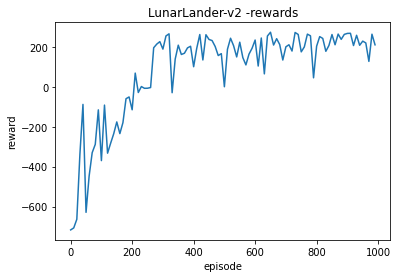

In [42]:
plt.figure()
plt.title("LunarLander-v2 -rewards")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_6)
plt.show()

## Double DQN with Prioritized Experience Replay Buffer and Target Network

source : https://arxiv.org/abs/1511.05952?context=cs

In [43]:
from collections import namedtuple
import typing

In [44]:
"""
Prioritized Experience Replay
"""


_field_names = [
    "state",
    "action",
    "reward",
    "done",
    "new_state"
    
]
Experience = namedtuple("Experience", field_names=_field_names)

class PrioritizedExperienceReplayBuffer:
    def __init__(self,
                 batch_size: int,
                 buffer_size: int,
                 alpha: float = 0.0,
                 random_state: np.random.RandomState = None) -> None:
        self._batch_size = batch_size
        self._buffer_size = buffer_size
        self._buffer_length = 0
        self._buffer = np.empty(self._buffer_size, dtype=[("priority", np.float32), ("experience", Experience)])
        self._alpha = alpha
        self._random_state = np.random.RandomState() if random_state is None else random_state
        
    def __len__(self) -> int:
        return self._buffer_length

    def alpha(self):
        return self._alpha

    def batch_size(self) -> int:
        return self._batch_size
    
    def buffer_size(self) -> int:
        return self._buffer_size

    def add(self, experience: Experience) -> None:
        priority = 1.0 if self.is_empty() else self._buffer["priority"].max()
        if self.is_full():
            if priority > self._buffer["priority"].min():
                idx = self._buffer["priority"].argmin()
                self._buffer[idx] = (priority, experience)
            else:
                pass
        else:
            self._buffer[self._buffer_length] = (priority, experience)
            self._buffer_length += 1

    def is_empty(self) -> bool:
        return self._buffer_length == 0
    
    def is_full(self) -> bool:
        return self._buffer_length == self._buffer_size
    
    def sample(self, beta: float) -> typing.Tuple[np.array, np.array, np.array]:
        ps = self._buffer[:self._buffer_length]["priority"]
        sampling_probs = ps**self._alpha / np.sum(ps**self._alpha)
        idxs = self._random_state.choice(np.arange(ps.size),
                                         size=self._batch_size,
                                         replace=True,
                                         p=sampling_probs)
        
        experiences = self._buffer["experience"][idxs]        
        weights = (self._buffer_length * sampling_probs[idxs])**-beta
        normalized_weights = weights / weights.max()
        
        return idxs, experiences, normalized_weights

    def update_priorities(self, idxs: np.array, priorities: np.array) -> None:
        self._buffer["priority"][idxs] = priorities
        

def exponential_annealing_schedule(episode, rate=1e-2):
    return 1 - np.exp(-rate * episode)

In [45]:
def test(q_network) :
    timestepmax = 2000
    state = env.reset()
    done = False
    cum_sum = 0
    iteration = 0
    while not done and iteration < timestepmax:
        state_t = torch.as_tensor(state , dtype = torch.float32).unsqueeze(0)
        action = torch.argmax(q_network(state_t)).item()
        new_state,reward,done,_ = env.step(action)
        state = new_state
        cum_sum += reward
        iteration += 1
        
    return cum_sum

In [46]:
nb_episode = 1000

discount_factor = 0.99
learning_rate = 2e-4
test_frequency = 10
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.02
batch_size = 64
size_replay_buffer = int(1e5)
update_frequency = 1

tau = 1e-3 

In [47]:
replay_buffer = PrioritizedExperienceReplayBuffer(batch_size,size_replay_buffer)
q_network = QNetwork(nb_actions,nb_observations)
q_target_network = QNetwork(nb_actions,nb_observations)

q_target_network.load_state_dict(q_network.state_dict())
optimizer = torch.optim.Adam(q_network.parameters(), lr=learning_rate)
list_tests_7 = []
timestep = 0
best_value = -1e9
average_last_test = deque(maxlen=100)

for episode in tqdm(range(nb_episode)) :
    
    epsilon = max(epsilon*epsilon_decay,epsilon_min)
    
    state = env.reset()
    
    done = False
    cumul = 0
    
    while not done : 
        
        state_t = torch.as_tensor(state , dtype = torch.float32).unsqueeze(0)
        
        if random.random() > epsilon :
            action = torch.argmax(q_network(state_t).detach()).item()
        
        else :
            action = env.action_space.sample()
        
        new_state,reward,done,_ = env.step(action)
        cumul += reward
        
        transition = (state , action , reward , done , new_state)
        
        replay_buffer.add(transition)
        
        # epsilon = np.interp(episode, [0, epsilon_decay], [epsilon_start, epsilon_end])
        
        if len(replay_buffer) >= batch_size and timestep % update_frequency == 0:
            
            
            beta = exponential_annealing_schedule(episode)
            
            idxs, experiences, normalized_weights = replay_buffer.sample(beta)

            _sampling_weights = (torch.as_tensor(normalized_weights, dtype=torch.float32).view((-1, 1)))
            
            states, actions, rewards, dones ,new_states  = (vs for vs in zip(*experiences))

            states_t = torch.stack([torch.as_tensor(o,dtype=torch.float32) for o in states]).squeeze()
            actions_t = torch.as_tensor(np.array([a for a in actions]) , dtype=torch.int64).unsqueeze(1)
            rewards_t = torch.as_tensor(np.array([r for r in rewards]) , dtype=torch.float32).unsqueeze(1)
            dones_t = torch.as_tensor(np.array([o for o in dones] , dtype = int) , dtype=torch.int32).unsqueeze(1)
            new_states_t = torch.stack([torch.as_tensor(o,dtype=torch.float32) for o in new_states]).squeeze()
            """
            
            batch = random.sample(replay_buffer,batch_size)

            states = np.asarray([exp[0] for exp in batch],dtype=np.float32)
            actions = np.asarray([exp[1] for exp in batch],dtype=int)
            rewards = np.asarray([exp[2] for exp in batch],dtype=np.float32)
            dones = np.asarray([exp[3] for exp in batch],dtype=int)
            new_states = np.asarray([exp[4] for exp in batch],dtype=np.float32)
            
            states_t = torch.as_tensor(states , dtype=torch.float32)
            dones_t = torch.as_tensor(dones , dtype = torch.int64).unsqueeze(1)
            new_states_t = torch.as_tensor(new_states , dtype=torch.float32)
            actions_t = torch.as_tensor(actions , dtype = torch.int64).unsqueeze(1)
            rewards_t = torch.as_tensor(rewards , dtype=torch.float32).unsqueeze(1)
            """
            
            # y_target = rewards_t + discount_factor * (1 - dones_t) * torch.gather(q_target_network(new_states_t),dim=1,index=torch.argmax(q_network(new_states_t),dim=1).unsqueeze(1))
            with torch.no_grad() :
                y_target = rewards_t + discount_factor * (1 - dones_t) * torch.max(q_target_network(new_states_t),dim=1)[0].unsqueeze(1)
            
            td_error = y_target - torch.gather(q_network(states_t),dim=1,index=actions_t)

            replay_buffer.update_priorities(idxs, td_error.abs().cpu().detach().numpy().flatten())
            
            mse = nn.MSELoss() # nn.HuberLoss()
            q_values = torch.gather(q_network(states_t),dim=1,index=actions_t)
            
            loss =  mse(y_target * _sampling_weights,q_values*_sampling_weights)

            # loss = - (torch.gather(q_network(states_t),dim=1,index=actions_t)*_sampling_weights*td_error.detach()).sum()#
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            for target_param, local_param in zip(q_target_network.parameters(), q_network.parameters()):
                target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)  
        timestep += 1
        
        state = new_state
        
    average_last_test.append(cumul)
    
    if episode % test_frequency == 0 :
        t =  0
        for _ in range(10) :
            t += test(q_network)
        t /= 10
        
        average = sum(average_last_test) / len(average_last_test)
        if t > best_value :
            print("test new best value : ",t," eps : ",epsilon,"avg : ",average)
            best_value = t
        else :
            print("test : ",t," eps : ",epsilon,"avg :",average)
        list_tests_7.append(t)
        

  0%|                                          | 1/1000 [00:00<08:27,  1.97it/s]

test new best value :  -810.812588077774  eps :  0.995 avg :  -243.89683498466033


  1%|▍                                        | 11/1000 [00:03<06:24,  2.57it/s]

test new best value :  -350.59702510453764  eps :  0.946354579813443 avg :  -187.77088575319087


  2%|▊                                        | 21/1000 [00:07<06:55,  2.36it/s]

test :  -549.6901290698418  eps :  0.9000874278732445 avg : -188.38201719702622


  3%|█▎                                       | 31/1000 [00:11<09:00,  1.79it/s]

test :  -592.5009400670289  eps :  0.8560822709551227 avg : -180.10184902653705


  4%|█▋                                       | 41/1000 [00:16<08:24,  1.90it/s]

test :  -680.9967026346407  eps :  0.8142285204175609 avg : -173.66734851800234


  5%|██                                       | 51/1000 [00:21<10:35,  1.49it/s]

test new best value :  -232.7726203799479  eps :  0.7744209942832988 avg :  -159.01172564966134


  6%|██▌                                      | 61/1000 [00:26<08:58,  1.74it/s]

test :  -255.39927961679268  eps :  0.736559652908221 avg : -151.44986449195662


  7%|██▉                                      | 71/1000 [00:33<21:40,  1.40s/it]

test :  -311.41035635182715  eps :  0.7005493475733617 avg : -152.98006234390482


  8%|███▎                                     | 81/1000 [00:44<35:11,  2.30s/it]

test new best value :  -231.75149418065038  eps :  0.6662995813682115 avg :  -147.38333774913875


  9%|███▌                                   | 91/1000 [01:02<1:06:40,  4.40s/it]

test new best value :  -154.2495979841298  eps :  0.6337242817644086 avg :  -141.65324045265714


 10%|████                                    | 101/1000 [01:16<54:48,  3.66s/it]

test :  -267.5451269648049  eps :  0.6027415843082742 avg : -135.23537690149988


 11%|████▍                                   | 111/1000 [01:32<55:04,  3.72s/it]

test :  -236.11183202286148  eps :  0.5732736268885887 avg : -124.93536978070686


 12%|████▊                                   | 121/1000 [01:47<55:07,  3.76s/it]

test :  -243.96438347791135  eps :  0.5452463540625918 avg : -114.92488203851016


 13%|████▉                                 | 131/1000 [02:05<1:04:08,  4.43s/it]

test :  -422.16425223932873  eps :  0.5185893309484582 avg : -108.64914096341664


 14%|█████▎                                | 141/1000 [02:24<1:08:06,  4.76s/it]

test :  -219.5725885007606  eps :  0.4932355662165453 avg : -99.3484131994719


 15%|█████▋                                | 151/1000 [02:45<1:12:49,  5.15s/it]

test :  -226.0610090963402  eps :  0.46912134373457726 avg : -93.17513096170616


 16%|██████                                | 161/1000 [03:05<1:03:14,  4.52s/it]

test :  -289.4185450180895  eps :  0.446186062443672 avg : -86.17590044708426


 17%|██████▍                               | 171/1000 [03:30<1:14:07,  5.37s/it]

test new best value :  -67.98378200039068  eps :  0.42437208406280985 avg :  -80.27989939985055


 18%|██████▉                               | 181/1000 [04:07<1:18:15,  5.73s/it]

test :  -426.84330484289586  eps :  0.4036245882390106 avg : -75.94294941285311


 19%|███████▋                                | 191/1000 [04:33<49:10,  3.65s/it]

test :  -254.1138211537052  eps :  0.38389143477919885 avg : -71.77623341178221


 20%|████████                                | 201/1000 [04:59<49:29,  3.72s/it]

test :  -147.23021375472177  eps :  0.36512303261753626 avg : -67.50756587688149


 21%|████████                              | 211/1000 [05:38<1:37:36,  7.42s/it]

test new best value :  -51.38820074502503  eps :  0.3472722151889232 avg :  -66.34519957386166


 22%|████████▍                             | 221/1000 [06:13<1:34:23,  7.27s/it]

test new best value :  -29.075238429539883  eps :  0.3302941218954743 avg :  -60.010732838715036


 23%|████████▊                             | 231/1000 [06:40<1:10:11,  5.48s/it]

test :  -75.97008348264488  eps :  0.3141460853680822 avg : -50.866129576431106


 24%|█████████▏                            | 241/1000 [07:06<1:03:36,  5.03s/it]

test new best value :  95.15180347778787  eps :  0.2987875242397482 avg :  -49.81691815916784


 25%|█████████▌                            | 251/1000 [07:53<1:42:17,  8.19s/it]

test :  -15.826223441004469  eps :  0.28417984116121187 avg : -40.78860390553412


 26%|██████████▍                             | 261/1000 [08:28<46:53,  3.81s/it]

test new best value :  168.16796077827027  eps :  0.2702863258025825 avg :  -35.888326976737254


 27%|██████████▎                           | 271/1000 [09:27<1:37:31,  8.03s/it]

test :  162.52620184877077  eps :  0.2570720625972084 avg : -15.97763684850887


 28%|██████████▋                           | 281/1000 [10:09<1:15:12,  6.28s/it]

test :  113.47237380941434  eps :  0.24450384299593592 avg : -5.933907309274191


 29%|███████████                           | 291/1000 [10:58<1:06:19,  5.61s/it]

test :  163.63959349740895  eps :  0.23255008201124722 avg : 7.921036393640704


 30%|███████████▍                          | 301/1000 [11:57<1:34:11,  8.09s/it]

test :  54.31917057974206  eps :  0.2211807388415433 avg : 22.247468054426207


 31%|███████████▊                          | 311/1000 [12:48<1:06:50,  5.82s/it]

test :  141.06926137028108  eps :  0.21036724137609603 avg : 38.46008467727413


 32%|████████████▏                         | 321/1000 [13:44<1:03:43,  5.63s/it]

test :  155.9125478844856  eps :  0.2000824143909432 avg : 50.95281408445321


 33%|█████████████▏                          | 331/1000 [14:31<53:25,  4.79s/it]

test :  116.86846856178045  eps :  0.1903004112552766 avg : 59.684728851311704


 34%|█████████████▋                          | 341/1000 [15:13<41:42,  3.80s/it]

test :  50.95054031772867  eps :  0.18099664897669618 avg : 69.8515650375435


 35%|██████████████                          | 351/1000 [15:38<22:45,  2.10s/it]

test :  29.006305046783943  eps :  0.17214774642209296 avg : 60.531844025989884


 36%|██████████████▍                         | 361/1000 [16:17<44:33,  4.18s/it]

test :  144.67437816580832  eps :  0.16373146555890544 avg : 64.68282556162482


 37%|██████████████▊                         | 371/1000 [16:46<47:35,  4.54s/it]

test :  -39.42646663457553  eps :  0.1557266555690826 avg : 55.558470534959326


 38%|███████████████▏                        | 381/1000 [17:18<33:14,  3.22s/it]

test :  -25.690111435143812  eps :  0.14811319969530845 avg : 54.21537143052962


 39%|███████████████▋                        | 391/1000 [17:32<20:03,  1.98s/it]

test :  28.46506244585803  eps :  0.14087196468590776 avg : 35.22295662233154


 40%|████████████████                        | 401/1000 [17:51<14:31,  1.45s/it]

test :  -51.78862819470213  eps :  0.13398475271138335 avg : 20.99449102696515


 41%|████████████████▍                       | 411/1000 [18:09<16:59,  1.73s/it]

test :  42.474695437809864  eps :  0.12743425563174798 avg : 13.584660996881382


 42%|████████████████▊                       | 421/1000 [18:17<10:49,  1.12s/it]

test :  -56.52997493550519  eps :  0.12120401149972035 avg : -4.011210008987947


 43%|█████████████████▏                      | 431/1000 [18:32<15:41,  1.66s/it]

test :  -84.28039656416063  eps :  0.11527836319047392 avg : -18.27220107508479


 44%|█████████████████▋                      | 441/1000 [18:47<11:47,  1.27s/it]

test :  -73.79732092987449  eps :  0.10964241905397228 avg : -31.12274642378304


 45%|██████████████████                      | 451/1000 [18:53<06:36,  1.39it/s]

test :  -126.75640883582051  eps :  0.1042820154910064 avg : -37.522126794328095


 46%|██████████████████▍                     | 461/1000 [19:13<13:20,  1.49s/it]

test :  -87.45479723411964  eps :  0.09918368135888474 avg : -48.4326213211863


 47%|██████████████████▊                     | 471/1000 [19:31<29:24,  3.34s/it]

test :  49.31804929766035  eps :  0.0943346041173244 avg : -57.80395502228769


 48%|███████████████████▏                    | 481/1000 [19:41<09:36,  1.11s/it]

test :  -110.93466712412314  eps :  0.08972259762946533 avg : -73.76935776452086


 49%|███████████████████▋                    | 491/1000 [20:01<27:00,  3.18s/it]

test :  -94.86137586260129  eps :  0.08533607153708872 avg : -69.62851635288435


 50%|████████████████████                    | 501/1000 [20:09<08:12,  1.01it/s]

test :  -199.56290060141353  eps :  0.0811640021330769 avg : -81.93557909315274


 51%|████████████████████▍                   | 511/1000 [20:17<07:29,  1.09it/s]

test :  -184.80876850296187  eps :  0.07719590465791494 avg : -101.1865738214502


 52%|████████████████████▊                   | 521/1000 [20:27<08:07,  1.02s/it]

test :  -178.9206885123611  eps :  0.07342180695061275 avg : -105.45844664817146


 53%|█████████████████████▏                  | 531/1000 [20:37<10:37,  1.36s/it]

test :  -89.85165890119386  eps :  0.06983222438783 avg : -115.77085951188485


 54%|█████████████████████▋                  | 541/1000 [20:54<14:10,  1.85s/it]

test :  -75.91424108861504  eps :  0.06641813604822402 avg : -118.31107136448666


 55%|██████████████████████                  | 551/1000 [21:07<10:41,  1.43s/it]

test :  -92.31538968921635  eps :  0.06317096204211972 avg : -115.89542294964907


 56%|██████████████████████▍                 | 561/1000 [21:21<12:17,  1.68s/it]

test :  57.38368409575101  eps :  0.06008254194952879 avg : -115.96437007942266


 57%|██████████████████████▊                 | 571/1000 [21:45<20:34,  2.88s/it]

test :  -14.789287695260947  eps :  0.05714511431233153 avg : -113.34994983539652


 58%|███████████████████████▏                | 581/1000 [22:16<38:12,  5.47s/it]

test :  -166.13013526773506  eps :  0.0543512971290831 avg : -108.48613880610374


 59%|███████████████████████▋                | 591/1000 [22:43<22:55,  3.36s/it]

test :  -183.5179574707766  eps :  0.05169406930342616 avg : -110.26897570522287


 60%|████████████████████████                | 601/1000 [23:20<34:13,  5.15s/it]

test :  -231.41641323279663  eps :  0.04916675299948831 avg : -86.50241449367336


 61%|████████████████████████▍               | 611/1000 [23:54<27:15,  4.21s/it]

test :  -58.34122195919177  eps :  0.04676299685992172 avg : -57.04347751415372


 62%|████████████████████████▊               | 621/1000 [24:41<47:20,  7.49s/it]

test :  -121.05812940204328  eps :  0.04447676004441063 avg : -48.87960013383335


 63%|█████████████████████████▏              | 631/1000 [25:29<36:43,  5.97s/it]

test :  2.5905398143632707  eps :  0.04230229704853423 avg : -24.986462122530785


 64%|█████████████████████████▋              | 641/1000 [26:05<28:39,  4.79s/it]

test :  -85.18936702084069  eps :  0.04023414326483323 avg : -20.23865346554431


 65%|██████████████████████████              | 651/1000 [26:48<34:58,  6.01s/it]

test :  -101.988452637198  eps :  0.03826710124979409 avg : -16.673528822752925


 66%|██████████████████████████▍             | 661/1000 [27:38<43:10,  7.64s/it]

test :  2.4907973276317206  eps :  0.036396227662238566 avg : -16.71194448092305


 67%|██████████████████████████▊             | 671/1000 [28:29<30:46,  5.61s/it]

test :  -120.45495262249999  eps :  0.03461682084029365 avg : -16.97508771293573


 68%|███████████████████████████▏            | 681/1000 [29:12<29:34,  5.56s/it]

test :  -52.66861278455334  eps :  0.032924408985721944 avg : -11.73564698548288


 69%|███████████████████████████▋            | 691/1000 [29:54<24:47,  4.81s/it]

test :  -25.533958810913397  eps :  0.03131473892591842 avg : 3.856833532525761


 70%|████████████████████████████            | 701/1000 [30:31<17:08,  3.44s/it]

test :  29.486788065886493  eps :  0.029783765425331846 avg : -6.170432945709016


 71%|████████████████████████████▍           | 711/1000 [31:18<26:51,  5.58s/it]

test :  19.127056005536993  eps :  0.02832764101944931 avg : -25.329070105397978


 72%|████████████████████████████▊           | 721/1000 [31:55<17:20,  3.73s/it]

test :  87.92443927133789  eps :  0.02694270634579598 avg : -14.526014339078351


 73%|█████████████████████████████▏          | 731/1000 [32:21<11:29,  2.56s/it]

test new best value :  225.8616133281001  eps :  0.02562548094765099 avg :  -4.099111351161526


 74%|█████████████████████████████▋          | 741/1000 [32:45<11:48,  2.74s/it]

test :  109.4862316250443  eps :  0.02437265452736848 avg : 10.119996665806294


 75%|██████████████████████████████          | 751/1000 [33:08<13:15,  3.19s/it]

test :  158.5925097759044  eps :  0.023181078627322618 avg : 31.83904955094796


 76%|██████████████████████████████▍         | 761/1000 [33:38<20:56,  5.26s/it]

test :  67.99435743970359  eps :  0.022047758717570132 avg : 51.219255144899826


 77%|██████████████████████████████▊         | 771/1000 [34:08<11:54,  3.12s/it]

test :  103.72850481587716  eps :  0.020969846670345987 avg : 66.67908678358697


 78%|███████████████████████████████▏        | 781/1000 [34:37<08:11,  2.25s/it]

test :  101.91170572579713  eps :  0.02 avg : 84.34597988518883


 79%|███████████████████████████████▋        | 791/1000 [35:02<10:18,  2.96s/it]

test :  211.06969689509123  eps :  0.02 avg : 94.6546331909358


 80%|████████████████████████████████        | 801/1000 [35:20<08:34,  2.58s/it]

test :  131.59073163338553  eps :  0.02 avg : 122.89945062363046


 81%|████████████████████████████████▍       | 811/1000 [35:42<08:28,  2.69s/it]

test :  112.81408530079918  eps :  0.02 avg : 147.53654593474073


 82%|████████████████████████████████▊       | 821/1000 [36:02<07:04,  2.37s/it]

test :  67.1779451214873  eps :  0.02 avg : 149.99650192891485


 83%|█████████████████████████████████▏      | 831/1000 [36:21<05:51,  2.08s/it]

test :  54.71284664070945  eps :  0.02 avg : 149.45328661689064


 84%|█████████████████████████████████▋      | 841/1000 [36:36<05:24,  2.04s/it]

test :  -94.3290348183538  eps :  0.02 avg : 160.95893760799132


 85%|██████████████████████████████████      | 851/1000 [36:59<06:42,  2.70s/it]

test :  63.01022418337561  eps :  0.02 avg : 158.60062505481702


 86%|██████████████████████████████████▍     | 861/1000 [37:14<04:17,  1.85s/it]

test :  95.83512062526344  eps :  0.02 avg : 172.70809262269165


 87%|██████████████████████████████████▊     | 871/1000 [37:30<03:57,  1.84s/it]

test new best value :  249.37039468062284  eps :  0.02 avg :  186.68710463787963


 88%|███████████████████████████████████▏    | 881/1000 [37:48<04:52,  2.46s/it]

test :  -135.44202450103325  eps :  0.02 avg : 188.6555314007706


 89%|███████████████████████████████████▋    | 891/1000 [38:07<04:38,  2.55s/it]

test :  94.45754899126675  eps :  0.02 avg : 187.94182565654592


 90%|████████████████████████████████████    | 901/1000 [38:24<03:47,  2.30s/it]

test :  129.45465647745078  eps :  0.02 avg : 181.20300207658877


 91%|████████████████████████████████████▍   | 911/1000 [38:45<03:24,  2.30s/it]

test :  124.94872013283566  eps :  0.02 avg : 188.59920593199695


 92%|████████████████████████████████████▊   | 921/1000 [39:01<02:05,  1.59s/it]

test new best value :  271.2906420393112  eps :  0.02 avg :  205.00912128870274


 93%|█████████████████████████████████████▏  | 931/1000 [39:22<03:14,  2.81s/it]

test :  36.52011339259872  eps :  0.02 avg : 212.17154695353258


 94%|█████████████████████████████████████▋  | 941/1000 [39:44<02:50,  2.89s/it]

test :  216.03126412892954  eps :  0.02 avg : 218.51551797999556


 95%|██████████████████████████████████████  | 951/1000 [40:01<01:49,  2.24s/it]

test :  253.7358774004485  eps :  0.02 avg : 231.34186194631798


 96%|██████████████████████████████████████▍ | 961/1000 [40:18<01:06,  1.71s/it]

test :  228.8647270325549  eps :  0.02 avg : 226.87682050894827


 97%|██████████████████████████████████████▊ | 971/1000 [40:38<01:15,  2.60s/it]

test :  218.71952093361105  eps :  0.02 avg : 227.8886124182622


 98%|███████████████████████████████████████▏| 981/1000 [41:02<00:50,  2.68s/it]

test :  156.65302911395008  eps :  0.02 avg : 226.77339678544743


 99%|███████████████████████████████████████▋| 991/1000 [41:21<00:21,  2.38s/it]

test :  227.20866845465085  eps :  0.02 avg : 233.11752978928223


100%|███████████████████████████████████████| 1000/1000 [41:35<00:00,  2.50s/it]


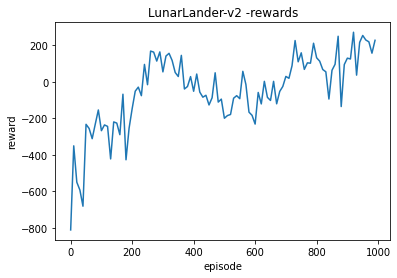

In [48]:
plt.figure()
plt.title("LunarLander-v2 -rewards")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_7)
plt.show()

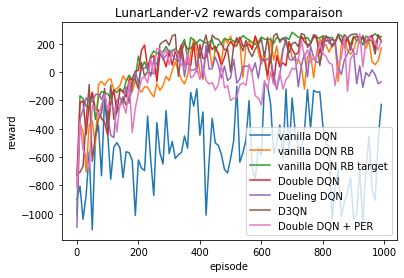

In [49]:
plt.figure()
plt.title("LunarLander-v2 rewards comparaison")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_1,label="vanilla DQN")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_2,label="vanilla DQN RB")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_3,label="vanilla DQN RB target")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_4,label="Double DQN")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_5,label="Dueling DQN")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_6,label="D3QN")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_7,label="Double DQN + PER")
plt.legend()
plt.show()

## D3QN with Prioritized Experience Replay Buffer and Target Network

In [50]:
nb_episode = 1000

discount_factor = 0.99
learning_rate = 2e-4
test_frequency = 10
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.02
batch_size = 64
size_replay_buffer = int(1e6)
update_frequency = 4

tau = 1e-3 

In [51]:
replay_buffer = PrioritizedExperienceReplayBuffer(batch_size,size_replay_buffer)
q_network = DuelingQNetwork(nb_actions,nb_observations)
q_target_network = DuelingQNetwork(nb_actions,nb_observations)
q_target_network.load_state_dict(q_network.state_dict())
optimizer = torch.optim.Adam(q_network.parameters(), lr=learning_rate)
list_tests_8 = []
timestep = 0

average_list = deque(maxlen=100)

for episode in tqdm(range(nb_episode)) :
    state = env.reset()
    done = False
    
    cumul = 0
    epsilon = max(epsilon * epsilon_decay,epsilon_min)
    
    while not done : 
        state_t = torch.as_tensor(state , dtype = torch.float32).unsqueeze(0)
        
        if random.random() > epsilon :
            action = torch.argmax(q_network(state_t)).item()
        else :
            action = env.action_space.sample()
            
        new_state,reward,done,_ = env.step(action)

        cumul += reward
        
        transition = (state,action,done,reward,new_state)
        
        replay_buffer.add(transition)
        
        if len(replay_buffer) >= batch_size and timestep % update_frequency == 0 :
        
            beta = exponential_annealing_schedule(episode)
            
            idxs, experiences, normalized_weights = replay_buffer.sample(beta)

            _sampling_weights = (torch.as_tensor(normalized_weights, dtype=torch.float32).view((-1, 1)))
            
            states, actions, rewards, dones ,new_states  = (vs for vs in zip(*experiences))

            states_t = torch.stack([torch.as_tensor(o,dtype=torch.float32) for o in states]).squeeze()
            actions_t = torch.as_tensor(np.array([a for a in actions]) , dtype=torch.int64).unsqueeze(1)
            rewards_t = torch.as_tensor(np.array([r for r in rewards]) , dtype=torch.float32).unsqueeze(1)
            dones_t = torch.as_tensor(np.array([o for o in dones] , dtype = int) , dtype=torch.int32).unsqueeze(1)
            new_states_t = torch.stack([torch.as_tensor(o,dtype=torch.float32) for o in new_states]).squeeze()
            
            with torch.no_grad() :
                y_target = rewards_t + discount_factor * (1 - dones_t) * torch.gather(q_target_network(new_states_t),dim=1,index=torch.argmax(q_network(new_states_t),dim=1).unsqueeze(1)).detach()

            td_error = y_target - torch.gather(q_network(states_t),dim=1,index=actions_t)

            replay_buffer.update_priorities(idxs, td_error.abs().cpu().detach().numpy().flatten())
            
            mse = nn.MSELoss()
            q_values = torch.gather(q_network(states_t),dim=1,index=actions_t)
            loss =  mse(y_target * _sampling_weights,q_values*_sampling_weights)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            for target_param, local_param in zip(q_target_network.parameters(), q_network.parameters()):
                target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)  
                
        timestep += 1
        
        state = new_state
        
    
    average_list.append(cumul)
    
    if episode % test_frequency == 0 :
        t = test(q_network)
        avg = sum(average_list) / len(average_list)
        print(f"episode {episode} - test reward : {t} - avg : {avg} - epsilon {epsilon}")
        list_tests_8.append(t)

  0%|                                          | 2/1000 [00:00<03:05,  5.37it/s]

episode 0 - test reward : -394.3788102940585 - avg : -305.81514979803444 - epsilon 0.995


  1%|▍                                        | 11/1000 [00:02<04:39,  3.54it/s]

episode 10 - test reward : -516.5575897113549 - avg : -177.73709073751735 - epsilon 0.946354579813443


  2%|▊                                        | 21/1000 [00:05<04:22,  3.72it/s]

episode 20 - test reward : -520.654379909593 - avg : -177.36877409449448 - epsilon 0.9000874278732445


  3%|█▎                                       | 31/1000 [00:08<03:57,  4.07it/s]

episode 30 - test reward : -419.20997548118726 - avg : -187.0982166931104 - epsilon 0.8560822709551227


  4%|█▋                                       | 41/1000 [00:10<03:57,  4.04it/s]

episode 40 - test reward : -140.02648396668448 - avg : -193.74808494552565 - epsilon 0.8142285204175609


  5%|██                                       | 51/1000 [00:13<03:35,  4.41it/s]

episode 50 - test reward : -90.58875145646232 - avg : -184.6745095901754 - epsilon 0.7744209942832988


  6%|██▌                                      | 61/1000 [00:15<03:58,  3.95it/s]

episode 60 - test reward : -99.2882029288711 - avg : -176.11214653291933 - epsilon 0.736559652908221


  7%|██▉                                      | 71/1000 [00:18<03:51,  4.01it/s]

episode 70 - test reward : -121.0576930016867 - avg : -167.4445201088901 - epsilon 0.7005493475733617


  8%|███▎                                     | 81/1000 [00:20<04:10,  3.67it/s]

episode 80 - test reward : -94.88120914965363 - avg : -164.32408189915415 - epsilon 0.6662995813682115


  9%|███▋                                     | 91/1000 [00:23<03:59,  3.80it/s]

episode 90 - test reward : -153.65730234053473 - avg : -161.80413073342137 - epsilon 0.6337242817644086


 10%|████                                    | 101/1000 [00:26<03:43,  4.02it/s]

episode 100 - test reward : -101.27081812866895 - avg : -154.03863237395785 - epsilon 0.6027415843082742


 11%|████▍                                   | 111/1000 [00:29<04:25,  3.34it/s]

episode 110 - test reward : -225.70709492321026 - avg : -151.20061135469962 - epsilon 0.5732736268885887


 12%|████▊                                   | 121/1000 [00:31<03:36,  4.07it/s]

episode 120 - test reward : -83.32483163123881 - avg : -146.61096661029865 - epsilon 0.5452463540625918


 13%|█████▏                                  | 131/1000 [00:34<03:50,  3.77it/s]

episode 130 - test reward : -36.82533796181987 - avg : -144.57763548350093 - epsilon 0.5185893309484582


 14%|█████▋                                  | 141/1000 [00:37<03:53,  3.68it/s]

episode 140 - test reward : -93.77839557944257 - avg : -142.33778769439624 - epsilon 0.4932355662165453


 15%|██████                                  | 151/1000 [00:40<03:41,  3.83it/s]

episode 150 - test reward : -60.86156134515967 - avg : -141.87337165958263 - epsilon 0.46912134373457726


 16%|██████▍                                 | 162/1000 [00:43<03:18,  4.22it/s]

episode 160 - test reward : -313.32105642750685 - avg : -140.58962802371138 - epsilon 0.446186062443672


 17%|██████▊                                 | 171/1000 [00:45<04:00,  3.44it/s]

episode 170 - test reward : -131.57058670807592 - avg : -145.046959326512 - epsilon 0.42437208406280985


 18%|███████▎                                | 182/1000 [00:48<03:04,  4.44it/s]

episode 180 - test reward : -287.75057787891086 - avg : -142.95165733874876 - epsilon 0.4036245882390106


 19%|███████▋                                | 191/1000 [00:50<04:17,  3.15it/s]

episode 190 - test reward : -211.518394756098 - avg : -146.53812175841733 - epsilon 0.38389143477919885


 20%|████████                                | 201/1000 [00:53<03:57,  3.36it/s]

episode 200 - test reward : -220.42920221248983 - avg : -156.3467404173275 - epsilon 0.36512303261753626


 21%|████████▍                               | 211/1000 [00:56<03:54,  3.36it/s]

episode 210 - test reward : -542.8564397569005 - avg : -172.3864850911871 - epsilon 0.3472722151889232


 22%|████████▊                               | 221/1000 [00:59<04:03,  3.20it/s]

episode 220 - test reward : -490.69208120459774 - avg : -179.66838654251765 - epsilon 0.3302941218954743


 23%|█████████▏                              | 231/1000 [01:02<04:06,  3.12it/s]

episode 230 - test reward : -360.3644278329697 - avg : -172.89934333750054 - epsilon 0.3141460853680822


 24%|█████████▋                              | 241/1000 [01:05<03:50,  3.29it/s]

episode 240 - test reward : -202.02129058790126 - avg : -170.44701759987998 - epsilon 0.2987875242397482


 25%|██████████                              | 251/1000 [01:08<03:47,  3.30it/s]

episode 250 - test reward : -296.9120472067252 - avg : -174.5913434592524 - epsilon 0.28417984116121187


 26%|██████████▍                             | 261/1000 [01:12<04:17,  2.87it/s]

episode 260 - test reward : -616.6796224234793 - avg : -183.22546273039384 - epsilon 0.2702863258025825


 27%|██████████▊                             | 271/1000 [01:16<04:55,  2.47it/s]

episode 270 - test reward : -211.75528995403738 - avg : -193.20150734400565 - epsilon 0.2570720625972084


 28%|███████████▏                            | 281/1000 [01:19<03:41,  3.25it/s]

episode 280 - test reward : -338.2276463676511 - avg : -204.21302223908606 - epsilon 0.24450384299593592


 29%|███████████▋                            | 291/1000 [01:23<04:37,  2.56it/s]

episode 290 - test reward : -392.6929625959168 - avg : -225.36100404489133 - epsilon 0.23255008201124722


 30%|████████████                            | 301/1000 [01:27<04:02,  2.88it/s]

episode 300 - test reward : -371.97526574399967 - avg : -241.15597076535533 - epsilon 0.2211807388415433


 31%|████████████▍                           | 311/1000 [01:31<06:15,  1.84it/s]

episode 310 - test reward : -680.70138948823 - avg : -250.71096454844258 - epsilon 0.21036724137609603


 32%|████████████▊                           | 321/1000 [01:35<05:03,  2.24it/s]

episode 320 - test reward : -685.242467368075 - avg : -269.59351482984766 - epsilon 0.2000824143909432


 33%|█████████████▎                          | 332/1000 [01:39<02:50,  3.93it/s]

episode 330 - test reward : -534.4468687630877 - avg : -302.7186685590063 - epsilon 0.1903004112552766


 34%|█████████████▋                          | 342/1000 [01:41<02:31,  4.34it/s]

episode 340 - test reward : -532.8289980486593 - avg : -331.6900426006847 - epsilon 0.18099664897669618


 35%|██████████████                          | 351/1000 [01:44<03:28,  3.12it/s]

episode 350 - test reward : -625.9562617397817 - avg : -362.08615886212385 - epsilon 0.17214774642209296


 36%|██████████████▍                         | 361/1000 [01:47<03:25,  3.11it/s]

episode 360 - test reward : -607.5899075348118 - avg : -397.05217961569315 - epsilon 0.16373146555890544


 37%|██████████████▊                         | 371/1000 [01:51<03:44,  2.80it/s]

episode 370 - test reward : -646.369152975187 - avg : -422.1587033290193 - epsilon 0.1557266555690826


 38%|███████████████▏                        | 381/1000 [01:54<03:01,  3.41it/s]

episode 380 - test reward : -685.7579065673777 - avg : -451.87042067478893 - epsilon 0.14811319969530845


 39%|███████████████▋                        | 391/1000 [01:57<03:09,  3.22it/s]

episode 390 - test reward : -778.7743396099734 - avg : -469.15880827453 - epsilon 0.14087196468590776


 40%|████████████████                        | 401/1000 [02:00<03:31,  2.83it/s]

episode 400 - test reward : -746.5997316605192 - avg : -489.24962095958597 - epsilon 0.13398475271138335


 41%|████████████████▍                       | 411/1000 [02:04<03:33,  2.76it/s]

episode 410 - test reward : -757.1135287926962 - avg : -514.1001313915625 - epsilon 0.12743425563174798


 42%|████████████████▊                       | 421/1000 [02:07<02:46,  3.48it/s]

episode 420 - test reward : -560.4054114114329 - avg : -533.8031859026988 - epsilon 0.12120401149972035


 43%|█████████████████▏                      | 431/1000 [02:10<02:53,  3.28it/s]

episode 430 - test reward : -1036.4730120362985 - avg : -540.7010463228022 - epsilon 0.11527836319047392


 44%|█████████████████▋                      | 441/1000 [02:13<02:42,  3.45it/s]

episode 440 - test reward : -524.4559998128567 - avg : -552.5603212956432 - epsilon 0.10964241905397228


 45%|██████████████████                      | 451/1000 [02:16<02:48,  3.26it/s]

episode 450 - test reward : -452.7385807957253 - avg : -554.0326080927047 - epsilon 0.1042820154910064


 46%|██████████████████▍                     | 461/1000 [02:21<03:55,  2.29it/s]

episode 460 - test reward : -621.6791453205681 - avg : -576.6559921619486 - epsilon 0.09918368135888474


 47%|██████████████████▊                     | 471/1000 [02:25<02:53,  3.05it/s]

episode 470 - test reward : -790.1226114704137 - avg : -596.8644277339388 - epsilon 0.0943346041173244


 48%|███████████████████▏                    | 481/1000 [02:28<02:41,  3.21it/s]

episode 480 - test reward : -586.549356522469 - avg : -605.366141620123 - epsilon 0.08972259762946533


 49%|███████████████████▋                    | 491/1000 [02:31<02:32,  3.34it/s]

episode 490 - test reward : -1034.1807955094978 - avg : -616.7454774933201 - epsilon 0.08533607153708872


 50%|████████████████████                    | 501/1000 [02:36<03:31,  2.36it/s]

episode 500 - test reward : -711.0311700878947 - avg : -639.5327032604004 - epsilon 0.0811640021330769


 51%|████████████████████▍                   | 511/1000 [02:40<02:36,  3.13it/s]

episode 510 - test reward : -504.0224312528812 - avg : -647.2425469746157 - epsilon 0.07719590465791494


 52%|████████████████████▊                   | 521/1000 [02:43<02:23,  3.35it/s]

episode 520 - test reward : -780.0517015496857 - avg : -639.8428492046576 - epsilon 0.07342180695061275


 53%|█████████████████████▏                  | 531/1000 [02:47<03:20,  2.34it/s]

episode 530 - test reward : -766.0470787066849 - avg : -664.5107718218675 - epsilon 0.06983222438783


 54%|█████████████████████▋                  | 541/1000 [02:51<03:03,  2.50it/s]

episode 540 - test reward : -1083.7914165298384 - avg : -689.8336761768388 - epsilon 0.06641813604822402


 55%|██████████████████████                  | 551/1000 [02:55<03:29,  2.15it/s]

episode 550 - test reward : -2928.5677110131674 - avg : -710.788106698109 - epsilon 0.06317096204211972


 56%|██████████████████████▍                 | 561/1000 [02:59<02:25,  3.02it/s]

episode 560 - test reward : -552.1077023868977 - avg : -711.0089045941577 - epsilon 0.06008254194952879


 57%|██████████████████████▊                 | 571/1000 [03:02<02:27,  2.91it/s]

episode 570 - test reward : -1469.8539272392225 - avg : -700.4172554675383 - epsilon 0.05714511431233153


 58%|███████████████████████▏                | 581/1000 [03:06<02:59,  2.33it/s]

episode 580 - test reward : -750.9519117003249 - avg : -726.2962990027273 - epsilon 0.0543512971290831


 59%|███████████████████████▋                | 591/1000 [03:10<02:07,  3.22it/s]

episode 590 - test reward : -702.4868010895322 - avg : -733.5712002903109 - epsilon 0.05169406930342616


 60%|████████████████████████                | 601/1000 [03:14<02:27,  2.71it/s]

episode 600 - test reward : -769.0896329337893 - avg : -749.9595512249043 - epsilon 0.04916675299948831


 61%|████████████████████████▍               | 611/1000 [03:19<02:09,  3.01it/s]

episode 610 - test reward : -1084.3009154741694 - avg : -761.8488935010494 - epsilon 0.04676299685992172


 62%|████████████████████████▊               | 621/1000 [03:22<02:03,  3.06it/s]

episode 620 - test reward : -626.995937309197 - avg : -786.1687831158431 - epsilon 0.04447676004441063


 63%|█████████████████████████▏              | 631/1000 [03:26<02:38,  2.33it/s]

episode 630 - test reward : -792.0902393858408 - avg : -784.1532058157685 - epsilon 0.04230229704853423


 64%|█████████████████████████▋              | 641/1000 [03:30<02:35,  2.31it/s]

episode 640 - test reward : -574.2645939914482 - avg : -770.0015567856192 - epsilon 0.04023414326483323


 65%|██████████████████████████              | 651/1000 [03:34<02:09,  2.70it/s]

episode 650 - test reward : -857.7158992657493 - avg : -788.9356324168563 - epsilon 0.03826710124979409


 66%|██████████████████████████▍             | 661/1000 [03:38<02:31,  2.24it/s]

episode 660 - test reward : -3929.3304766284737 - avg : -780.5638278216188 - epsilon 0.036396227662238566


 67%|██████████████████████████▊             | 671/1000 [03:42<02:08,  2.55it/s]

episode 670 - test reward : -2229.9416673455244 - avg : -804.1847374672969 - epsilon 0.03461682084029365


 68%|███████████████████████████▏            | 681/1000 [03:47<02:14,  2.37it/s]

episode 680 - test reward : -552.8958025558059 - avg : -832.7223295478924 - epsilon 0.032924408985721944


 69%|███████████████████████████▋            | 691/1000 [03:52<02:38,  1.94it/s]

episode 690 - test reward : -1757.8747113144634 - avg : -861.0372681708865 - epsilon 0.03131473892591842


 70%|████████████████████████████            | 701/1000 [03:55<01:59,  2.51it/s]

episode 700 - test reward : -981.7860268856253 - avg : -834.0322165215159 - epsilon 0.029783765425331846


 71%|████████████████████████████▍           | 711/1000 [04:01<02:49,  1.71it/s]

episode 710 - test reward : -597.7103846323685 - avg : -870.2290135682297 - epsilon 0.02832764101944931


 72%|████████████████████████████▊           | 721/1000 [04:05<01:58,  2.36it/s]

episode 720 - test reward : -921.5247473767575 - avg : -861.4249291844661 - epsilon 0.02694270634579598


 73%|█████████████████████████████▏          | 731/1000 [04:11<02:43,  1.64it/s]

episode 730 - test reward : -1171.257760584307 - avg : -853.9190763700357 - epsilon 0.02562548094765099


 74%|█████████████████████████████▋          | 741/1000 [04:15<02:22,  1.82it/s]

episode 740 - test reward : -950.9032893196687 - avg : -861.9747742277716 - epsilon 0.02437265452736848


 75%|██████████████████████████████          | 751/1000 [04:21<01:41,  2.45it/s]

episode 750 - test reward : -1348.2813430239269 - avg : -897.4333860530637 - epsilon 0.023181078627322618


 76%|██████████████████████████████▍         | 761/1000 [04:25<01:34,  2.53it/s]

episode 760 - test reward : -495.32174143833316 - avg : -911.2463027042786 - epsilon 0.022047758717570132


 77%|██████████████████████████████▊         | 771/1000 [04:29<01:47,  2.13it/s]

episode 770 - test reward : -3085.831426128145 - avg : -899.8152031970868 - epsilon 0.020969846670345987


 78%|███████████████████████████████▏        | 781/1000 [04:33<01:25,  2.55it/s]

episode 780 - test reward : -467.3916430932437 - avg : -858.8166466686436 - epsilon 0.02


 79%|███████████████████████████████▋        | 791/1000 [04:38<01:38,  2.11it/s]

episode 790 - test reward : -1136.9286853532778 - avg : -861.5751156556472 - epsilon 0.02


 80%|████████████████████████████████        | 801/1000 [04:42<01:11,  2.77it/s]

episode 800 - test reward : -1012.433014711756 - avg : -863.1329158301471 - epsilon 0.02


 81%|████████████████████████████████▍       | 811/1000 [04:46<01:24,  2.23it/s]

episode 810 - test reward : -2704.1602234997627 - avg : -807.956292498796 - epsilon 0.02


 82%|████████████████████████████████▊       | 821/1000 [04:52<01:59,  1.50it/s]

episode 820 - test reward : -914.3100196127884 - avg : -844.7227545931157 - epsilon 0.02


 83%|█████████████████████████████████▏      | 831/1000 [04:57<01:20,  2.09it/s]

episode 830 - test reward : -598.7061841702873 - avg : -897.5359942856088 - epsilon 0.02


 84%|█████████████████████████████████▋      | 841/1000 [05:02<01:25,  1.85it/s]

episode 840 - test reward : -913.1947484883043 - avg : -905.2718261627793 - epsilon 0.02


 85%|██████████████████████████████████      | 851/1000 [05:07<01:07,  2.22it/s]

episode 850 - test reward : -641.9503231259353 - avg : -867.9571231631899 - epsilon 0.02


 86%|██████████████████████████████████▍     | 861/1000 [05:12<01:12,  1.91it/s]

episode 860 - test reward : -793.5641912970857 - avg : -882.9251153937656 - epsilon 0.02


 87%|██████████████████████████████████▊     | 871/1000 [05:15<00:40,  3.18it/s]

episode 870 - test reward : -781.4438364195744 - avg : -860.3464766842014 - epsilon 0.02


 88%|███████████████████████████████████▏    | 881/1000 [05:22<01:08,  1.74it/s]

episode 880 - test reward : -503.5405929654176 - avg : -931.0355257547501 - epsilon 0.02


 89%|███████████████████████████████████▋    | 891/1000 [05:27<00:59,  1.83it/s]

episode 890 - test reward : -641.4375280890048 - avg : -912.8376837644298 - epsilon 0.02


 90%|████████████████████████████████████    | 901/1000 [05:31<00:34,  2.83it/s]

episode 900 - test reward : -1945.0266438597855 - avg : -906.9640560735264 - epsilon 0.02


 91%|████████████████████████████████████▍   | 911/1000 [05:35<00:39,  2.28it/s]

episode 910 - test reward : -1198.4015609500075 - avg : -915.9157388318886 - epsilon 0.02


 92%|████████████████████████████████████▊   | 921/1000 [05:40<00:47,  1.65it/s]

episode 920 - test reward : -553.503245844781 - avg : -909.8285335150887 - epsilon 0.02


 93%|█████████████████████████████████████▏  | 931/1000 [05:45<00:42,  1.62it/s]

episode 930 - test reward : -721.1289841578032 - avg : -890.3225329574293 - epsilon 0.02


 94%|█████████████████████████████████████▋  | 941/1000 [05:52<00:31,  1.88it/s]

episode 940 - test reward : -474.3026828778681 - avg : -977.3398534228114 - epsilon 0.02


 95%|██████████████████████████████████████  | 951/1000 [05:56<00:18,  2.64it/s]

episode 950 - test reward : -2011.8478898196568 - avg : -951.877215345547 - epsilon 0.02


 96%|██████████████████████████████████████▍ | 961/1000 [06:00<00:14,  2.73it/s]

episode 960 - test reward : -687.0671397890924 - avg : -936.2026200389423 - epsilon 0.02


 97%|██████████████████████████████████████▊ | 971/1000 [06:05<00:13,  2.10it/s]

episode 970 - test reward : -560.2101514529471 - avg : -1001.239128657504 - epsilon 0.02


 98%|███████████████████████████████████████▏| 981/1000 [06:09<00:06,  2.95it/s]

episode 980 - test reward : -545.0566757773026 - avg : -915.2040763795387 - epsilon 0.02


 99%|███████████████████████████████████████▋| 991/1000 [06:13<00:03,  2.52it/s]

episode 990 - test reward : -659.7904964323401 - avg : -893.4119497612757 - epsilon 0.02


100%|███████████████████████████████████████| 1000/1000 [06:18<00:00,  2.64it/s]


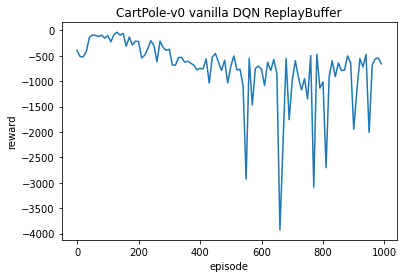

In [52]:
plt.figure()
plt.title("CartPole-v0 vanilla DQN ReplayBuffer")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_8)
plt.show()

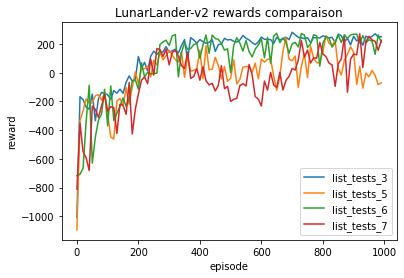

In [53]:
plt.figure()
plt.title("LunarLander-v2 rewards comparaison")
plt.xlabel("episode")
plt.ylabel("reward")
# plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_1,label="list_tests_1")
# plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_2,label="list_tests_2")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_3,label="list_tests_3")
# plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_4,label="list_tests_4")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_5,label="list_tests_5")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_6,label="list_tests_6")
plt.plot(np.arange(0,nb_episode,test_frequency),list_tests_7,label="list_tests_7")
plt.legend()
plt.show()